In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

# 01 Read, training and testing data

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender_submission = pd.read_csv('gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data Descriptions

**Survival:** 0 = No, 1 = Yes

**pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex

**Age:** Age in years

**sibsp:** number of siblings/spouses aboard the Titanic

**parch:** number of parents/children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# 02 Describe Data

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 03 What missing Value

<AxesSubplot:>

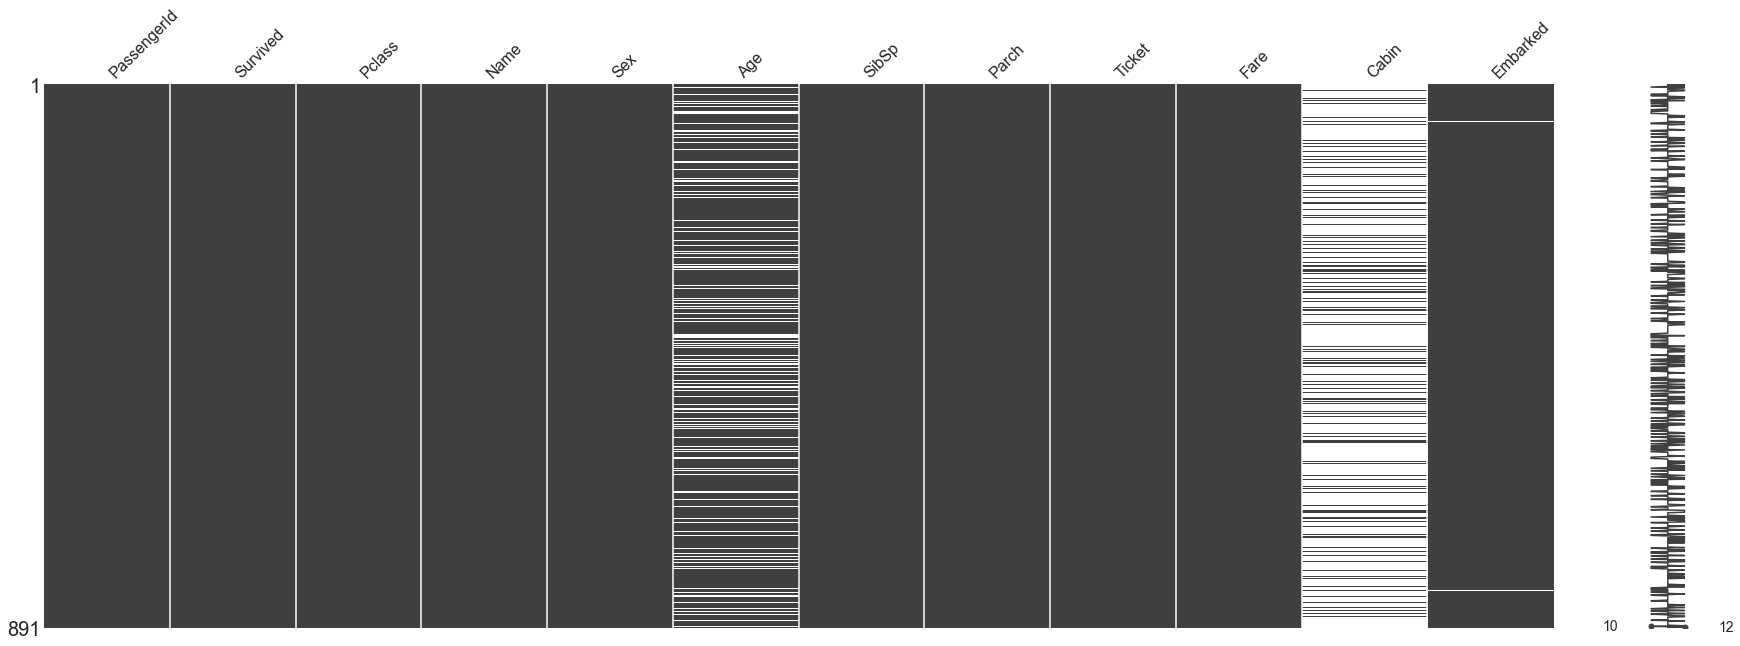

In [6]:
missingno.matrix(train, figsize=(30,10))

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 04 Perform Data Analysis

Create 2 dataframe

In [8]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

What datatype for each column?

In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Explore Each Features

# #1 For Feature: Survived

Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

This is the variable we want our machine learning model to predict based off all the others.

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


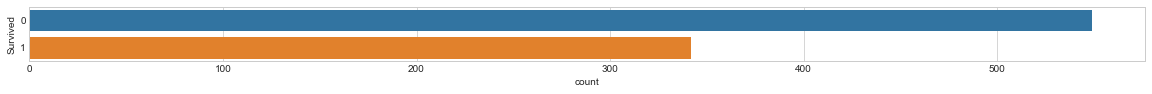

In [11]:
plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data = train)
print(train.Survived.value_counts())

In [12]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [13]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [14]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Feature: Pclass

Description: The ticket class of the passenger.
    
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

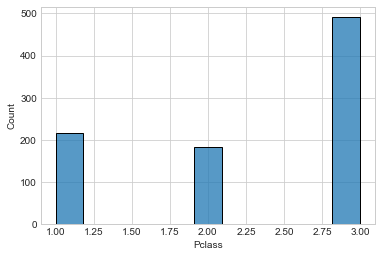

In [15]:
sns.histplot(train.Pclass)

In [16]:
train.Pclass.isnull().sum()

0

In [17]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

### Feature: Name
    
Description: The name of the passenger.

In [18]:
train.Name.value_counts()

Kalvik, Mr. Johannes Halvorsen                           1
Rice, Mrs. William (Margaret Norton)                     1
Hassab, Mr. Hammad                                       1
Kelly, Miss. Mary                                        1
Hoyt, Mr. William Fisher                                 1
                                                        ..
Ford, Miss. Robina Maggie "Ruby"                         1
Andersson, Miss. Ebba Iris Alfrida                       1
Newell, Miss. Madeleine                                  1
Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)    1
Adahl, Mr. Mauritz Nils Martin                           1
Name: Name, Length: 891, dtype: int64

### Feature: Sex

Description: The sex of the passenger (male or female).

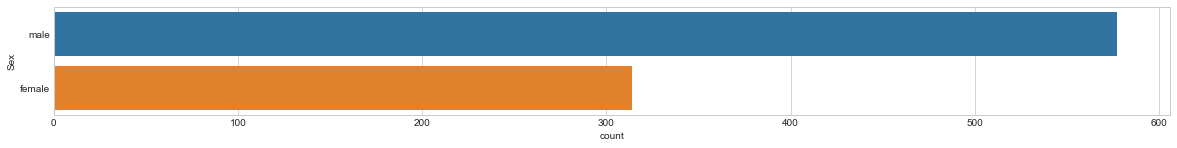

In [19]:
plt.figure(figsize=(20, 2))
sns.countplot(y="Sex", data=train);

In [20]:
train.Sex.isnull().sum()

0

In [21]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [22]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'male', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

In [23]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


In [29]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


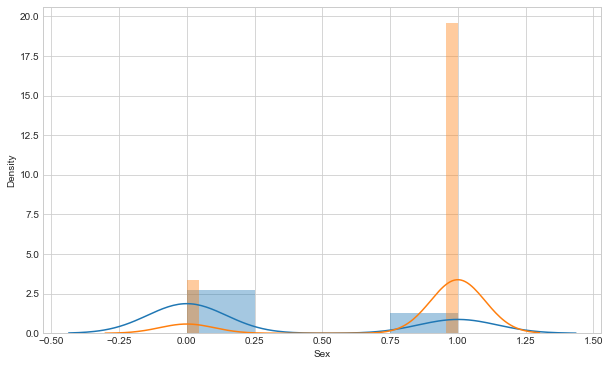

In [25]:
fig = plt.figure(figsize=(10, 6))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

### Feature: Age

Description: The age of the passenger

In [26]:
train.Age.isnull().sum()

177

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
mean_imp = SimpleImputer(strategy = 'mean')

In [30]:
df_bin[['Age']] = mean_imp.fit_transform(train[['Age']])

In [32]:
df_con[['Age']] = mean_imp.fit_transform(train[['Age']])

In [31]:
df_bin['Age'].isnull().sum()

0

In [33]:
df_con['Age'].isnull().sum()

0

In [39]:
df_bin.head()

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


### Function to create count and distribution visualisations

In [40]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

### Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic

In [41]:
train.SibSp.isnull().sum()

0

In [42]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [43]:

df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

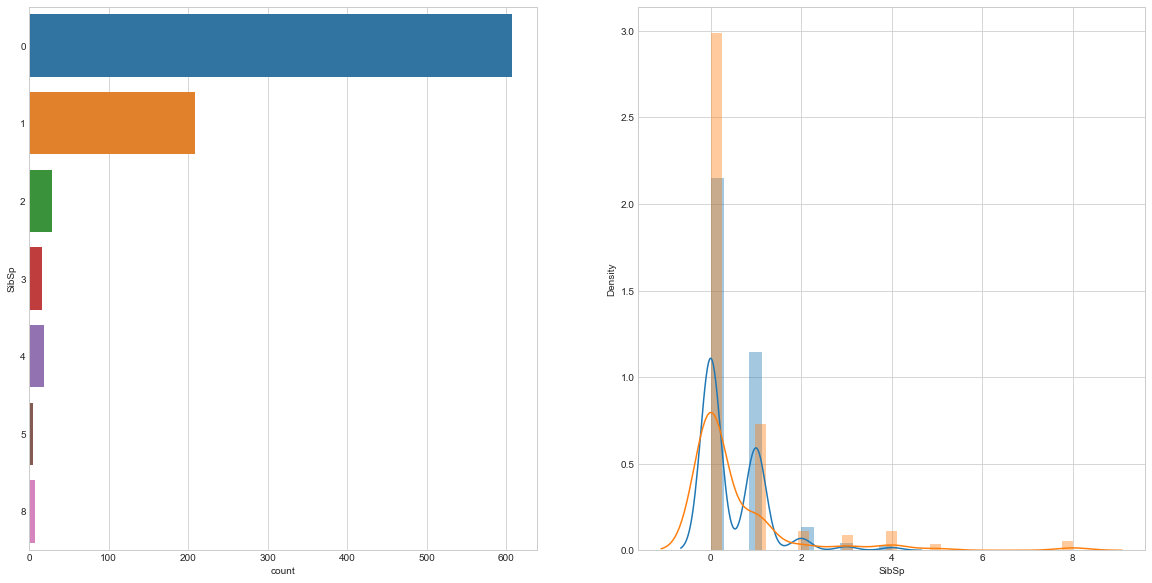

In [44]:
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

### Feature: Parch

Description: The number of parents/children the passenger has aboard the Titanic.

In [45]:
train.Parch.isnull().sum()

0

In [46]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

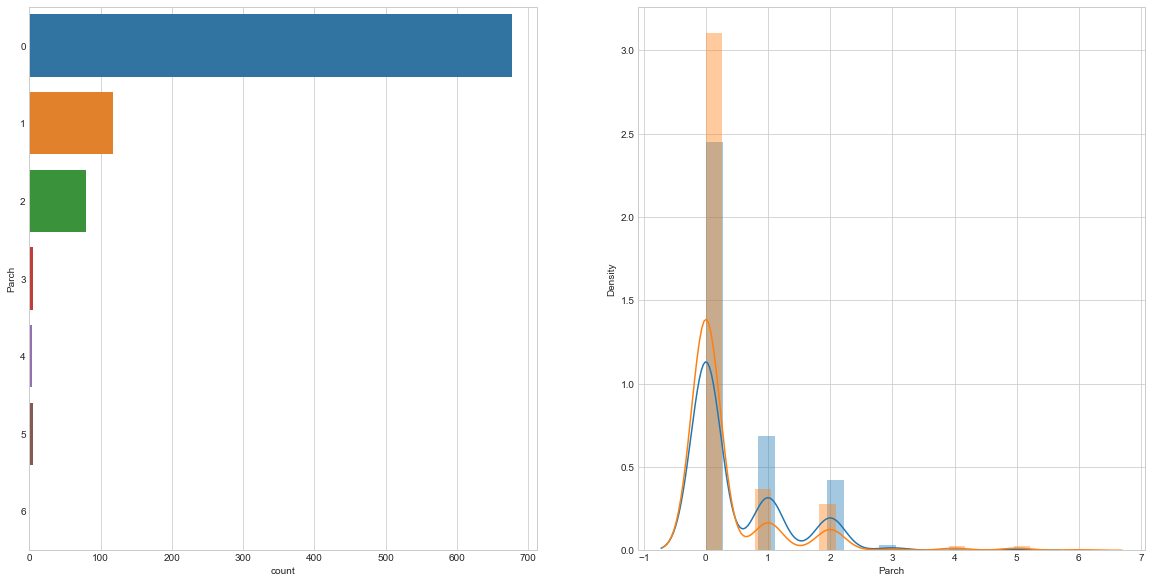

In [47]:
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

In [48]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


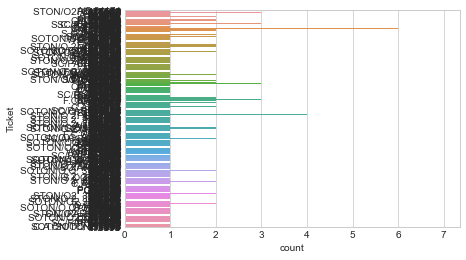

In [49]:
sns.countplot(y="Ticket", data=train);

In [51]:
train.Ticket.value_counts()

347082        7
CA. 2343      7
1601          7
347088        6
3101295       6
             ..
PP 4348       1
2680          1
C 17369       1
392092        1
A.5. 11206    1
Name: Ticket, Length: 681, dtype: int64

### Feature: Fare

Description: How much the ticket cost.

In [52]:
train.Fare.isnull().sum()

0

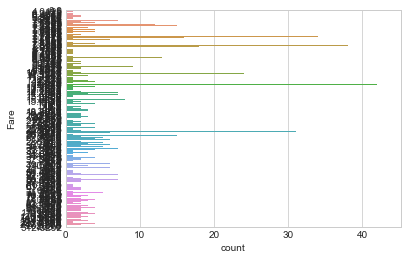

In [53]:
sns.countplot(y="Fare", data=train);

In [54]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised 

In [55]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

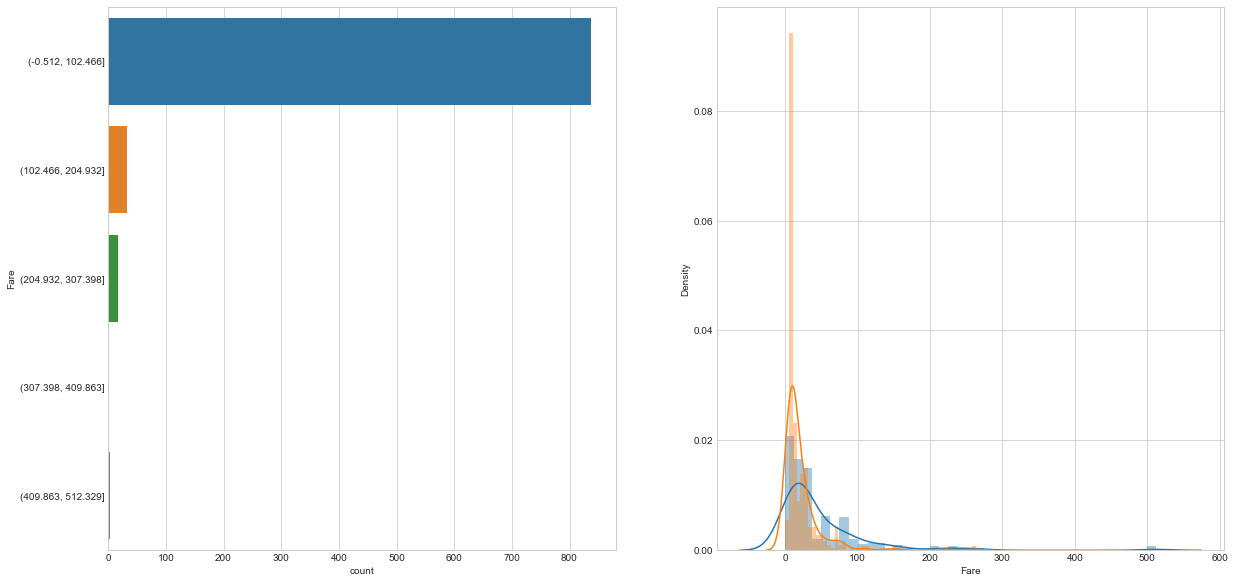

In [56]:
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

### Feature: Cabin

Description: The cabin number where the passenger was staying.    

In [57]:
train.Cabin.isnull().sum()

687

### Feature: Embarked

Description: The port where the passenger boarded the Titanic.
    
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [58]:
train.Embarked.isnull().sum()

2

In [59]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

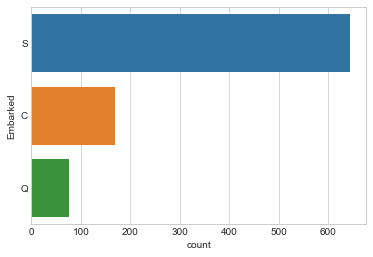

In [60]:
sns.countplot(y='Embarked', data=train);

In [61]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [62]:
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


### Feature Encoding
Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (`df_bin`) with one-hot encoding and our continuous dataframe (`df_con`) with the label encoding function from `sklearn`.

In [63]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,"(-0.512, 102.466]",S
1,1,1,0,38.0,1,0,"(-0.512, 102.466]",C
2,1,3,0,26.0,0,0,"(-0.512, 102.466]",S
3,1,1,0,35.0,1,0,"(-0.512, 102.466]",S
4,0,3,1,35.0,0,0,"(-0.512, 102.466]",S


In [64]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0.42,Age_0.67,Age_0.75,Age_0.83,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [65]:
df_con.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [66]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [67]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [68]:

df_con_enc.head(20)

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,29.699118,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,54.000000,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,2.000000,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,27.000000,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,14.000000,1,0,30.0708,1,0,0,1,0,0,1,0


# 05 Building Machine Learning

In [69]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [70]:
selected_df.head()

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [71]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [72]:
X_train.shape

(889, 12)

In [73]:
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


### Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [74]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [75]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 80.43
Accuracy CV 10-Fold: 79.87
Running Time: 0:00:06.248016


### K-Nearest Neighbours

In [76]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 82.11
Accuracy CV 10-Fold: 71.09
Running Time: 0:00:00.332024


### Gaussian Naive Bayes

In [77]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 78.4
Running Time: 0:00:00.092007


### Linear Support Vector Machines (SVC)

In [79]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 65.13
Accuracy CV 10-Fold: 73.12
Running Time: 0:00:00.457055


### Stochastic Gradient Descent

In [80]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 70.53
Accuracy CV 10-Fold: 71.65
Running Time: 0:00:00.124010


### Decision Tree Classifier

In [81]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 98.2
Accuracy CV 10-Fold: 77.84
Running Time: 0:00:09.891587


### Gradient Boost Trees

In [82]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))


Accuracy: 89.2
Accuracy CV 10-Fold: 83.01
Running Time: 0:00:01.863487


### CatBoost Algorithm

In [83]:
# View the data for the CatBoost model
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [84]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [85]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [86]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [87]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [88]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6873212	total: 247ms	remaining: 4m 6s
1:	learn: 0.6829498	total: 309ms	remaining: 2m 34s
2:	learn: 0.6779695	total: 405ms	remaining: 2m 14s
3:	learn: 0.6723342	total: 490ms	remaining: 2m 2s
4:	learn: 0.6666852	total: 586ms	remaining: 1m 56s
5:	learn: 0.6611263	total: 650ms	remaining: 1m 47s
6:	learn: 0.6558915	total: 695ms	remaining: 1m 38s
7:	learn: 0.6502407	total: 760ms	remaining: 1m 34s
8:	learn: 0.6443115	total: 815ms	remaining: 1m 29s
9:	learn: 0.6413214	total: 844ms	remaining: 1m 23s
10:	learn: 0.6364215	total: 930ms	remaining: 1m 23s
11:	learn: 0.6309709	total: 993ms	remaining: 1m 21s
12:	learn: 0.6264148	total: 1.06s	remaining: 1m 20s
13:	learn: 0.6212365	total: 1.18s	remaining: 1m 23s
14:	learn: 0.6167318	total: 1.25s	remaining: 1m 22s
15:	learn: 0.6118775	total: 1.34s	remaining: 1m 22s
16:	learn: 0.6076579	total: 1.42s	remaining: 1m 22s
17:	learn: 0.6051730	total: 1.47s	remaining: 1m 20s
18:	learn: 0.6009280	total: 1.53s	remaining: 1

160:	learn: 0.4009723	total: 9.92s	remaining: 51.7s
161:	learn: 0.4005603	total: 9.98s	remaining: 51.6s
162:	learn: 0.4000577	total: 10s	remaining: 51.6s
163:	learn: 0.3997253	total: 10.1s	remaining: 51.5s
164:	learn: 0.3994034	total: 10.2s	remaining: 51.5s
165:	learn: 0.3991642	total: 10.2s	remaining: 51.5s
166:	learn: 0.3991402	total: 10.3s	remaining: 51.2s
167:	learn: 0.3987767	total: 10.3s	remaining: 51.1s
168:	learn: 0.3985634	total: 10.4s	remaining: 51s
169:	learn: 0.3981374	total: 10.4s	remaining: 50.9s
170:	learn: 0.3978033	total: 10.5s	remaining: 50.8s
171:	learn: 0.3977280	total: 10.5s	remaining: 50.7s
172:	learn: 0.3973401	total: 10.6s	remaining: 50.6s
173:	learn: 0.3969788	total: 10.6s	remaining: 50.6s
174:	learn: 0.3962417	total: 10.7s	remaining: 50.5s
175:	learn: 0.3960041	total: 10.8s	remaining: 50.4s
176:	learn: 0.3959461	total: 10.8s	remaining: 50.1s
177:	learn: 0.3957616	total: 10.8s	remaining: 50s
178:	learn: 0.3956915	total: 10.9s	remaining: 50s
179:	learn: 0.395424

319:	learn: 0.3642454	total: 20.3s	remaining: 43.1s
320:	learn: 0.3641323	total: 20.4s	remaining: 43s
321:	learn: 0.3639806	total: 20.4s	remaining: 43s
322:	learn: 0.3638846	total: 20.5s	remaining: 42.9s
323:	learn: 0.3638714	total: 20.5s	remaining: 42.8s
324:	learn: 0.3638656	total: 20.5s	remaining: 42.7s
325:	learn: 0.3637937	total: 20.6s	remaining: 42.6s
326:	learn: 0.3637581	total: 20.7s	remaining: 42.5s
327:	learn: 0.3635720	total: 20.7s	remaining: 42.4s
328:	learn: 0.3632581	total: 20.8s	remaining: 42.4s
329:	learn: 0.3630548	total: 20.9s	remaining: 42.3s
330:	learn: 0.3630143	total: 20.9s	remaining: 42.2s
331:	learn: 0.3628067	total: 21s	remaining: 42.2s
332:	learn: 0.3626156	total: 21s	remaining: 42.1s
333:	learn: 0.3624744	total: 21.1s	remaining: 42s
334:	learn: 0.3622708	total: 21.2s	remaining: 42s
335:	learn: 0.3620152	total: 21.2s	remaining: 41.9s
336:	learn: 0.3618384	total: 21.3s	remaining: 41.8s
337:	learn: 0.3618104	total: 21.3s	remaining: 41.8s
338:	learn: 0.3618087	to

480:	learn: 0.3472842	total: 30.3s	remaining: 32.7s
481:	learn: 0.3471907	total: 30.3s	remaining: 32.6s
482:	learn: 0.3471263	total: 30.4s	remaining: 32.6s
483:	learn: 0.3470634	total: 30.5s	remaining: 32.5s
484:	learn: 0.3469101	total: 30.6s	remaining: 32.5s
485:	learn: 0.3468307	total: 30.7s	remaining: 32.4s
486:	learn: 0.3466548	total: 30.8s	remaining: 32.4s
487:	learn: 0.3465057	total: 30.9s	remaining: 32.4s
488:	learn: 0.3464631	total: 31s	remaining: 32.4s
489:	learn: 0.3464239	total: 31.1s	remaining: 32.3s
490:	learn: 0.3463688	total: 31.1s	remaining: 32.3s
491:	learn: 0.3461688	total: 31.2s	remaining: 32.2s
492:	learn: 0.3460737	total: 31.2s	remaining: 32.1s
493:	learn: 0.3459693	total: 31.3s	remaining: 32.1s
494:	learn: 0.3458707	total: 31.4s	remaining: 32s
495:	learn: 0.3458707	total: 31.4s	remaining: 31.9s
496:	learn: 0.3457792	total: 31.5s	remaining: 31.9s
497:	learn: 0.3457313	total: 31.5s	remaining: 31.8s
498:	learn: 0.3456593	total: 31.6s	remaining: 31.8s
499:	learn: 0.34

640:	learn: 0.3319922	total: 40.8s	remaining: 22.8s
641:	learn: 0.3319667	total: 40.9s	remaining: 22.8s
642:	learn: 0.3318067	total: 41.1s	remaining: 22.8s
643:	learn: 0.3317815	total: 41.1s	remaining: 22.7s
644:	learn: 0.3317118	total: 41.2s	remaining: 22.7s
645:	learn: 0.3316242	total: 41.2s	remaining: 22.6s
646:	learn: 0.3314718	total: 41.3s	remaining: 22.5s
647:	learn: 0.3314470	total: 41.4s	remaining: 22.5s
648:	learn: 0.3309991	total: 41.5s	remaining: 22.4s
649:	learn: 0.3308993	total: 41.5s	remaining: 22.4s
650:	learn: 0.3308701	total: 41.6s	remaining: 22.3s
651:	learn: 0.3306837	total: 41.6s	remaining: 22.2s
652:	learn: 0.3306571	total: 41.6s	remaining: 22.1s
653:	learn: 0.3305071	total: 41.7s	remaining: 22.1s
654:	learn: 0.3305034	total: 41.7s	remaining: 22s
655:	learn: 0.3302847	total: 41.8s	remaining: 21.9s
656:	learn: 0.3302707	total: 41.9s	remaining: 21.8s
657:	learn: 0.3302307	total: 41.9s	remaining: 21.8s
658:	learn: 0.3298694	total: 42s	remaining: 21.7s
659:	learn: 0.32

801:	learn: 0.3176991	total: 51.3s	remaining: 12.7s
802:	learn: 0.3176323	total: 51.4s	remaining: 12.6s
803:	learn: 0.3176217	total: 51.5s	remaining: 12.5s
804:	learn: 0.3173892	total: 51.5s	remaining: 12.5s
805:	learn: 0.3172296	total: 51.7s	remaining: 12.4s
806:	learn: 0.3170987	total: 51.7s	remaining: 12.4s
807:	learn: 0.3170909	total: 51.7s	remaining: 12.3s
808:	learn: 0.3169539	total: 51.8s	remaining: 12.2s
809:	learn: 0.3168740	total: 51.9s	remaining: 12.2s
810:	learn: 0.3168428	total: 51.9s	remaining: 12.1s
811:	learn: 0.3167363	total: 52s	remaining: 12s
812:	learn: 0.3166265	total: 52s	remaining: 12s
813:	learn: 0.3165764	total: 52.1s	remaining: 11.9s
814:	learn: 0.3163379	total: 52.2s	remaining: 11.8s
815:	learn: 0.3161558	total: 52.2s	remaining: 11.8s
816:	learn: 0.3160842	total: 52.3s	remaining: 11.7s
817:	learn: 0.3158871	total: 52.4s	remaining: 11.6s
818:	learn: 0.3157142	total: 52.4s	remaining: 11.6s
819:	learn: 0.3154867	total: 52.5s	remaining: 11.5s
820:	learn: 0.315388

961:	learn: 0.3017461	total: 1m 2s	remaining: 2.47s
962:	learn: 0.3015859	total: 1m 2s	remaining: 2.4s
963:	learn: 0.3013741	total: 1m 2s	remaining: 2.34s
964:	learn: 0.3012401	total: 1m 2s	remaining: 2.28s
965:	learn: 0.3011194	total: 1m 2s	remaining: 2.21s
966:	learn: 0.3010417	total: 1m 2s	remaining: 2.15s
967:	learn: 0.3009501	total: 1m 2s	remaining: 2.08s
968:	learn: 0.3008084	total: 1m 3s	remaining: 2.02s
969:	learn: 0.3007026	total: 1m 3s	remaining: 1.95s
970:	learn: 0.3004490	total: 1m 3s	remaining: 1.89s
971:	learn: 0.3002189	total: 1m 3s	remaining: 1.82s
972:	learn: 0.3000373	total: 1m 3s	remaining: 1.76s
973:	learn: 0.2999486	total: 1m 3s	remaining: 1.69s
974:	learn: 0.2998108	total: 1m 3s	remaining: 1.63s
975:	learn: 0.2997655	total: 1m 3s	remaining: 1.56s
976:	learn: 0.2997471	total: 1m 3s	remaining: 1.5s
977:	learn: 0.2996570	total: 1m 3s	remaining: 1.43s
978:	learn: 0.2994042	total: 1m 3s	remaining: 1.36s
979:	learn: 0.2993568	total: 1m 3s	remaining: 1.3s
980:	learn: 0.2

### Perform CatBoost cross-validation

In [89]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6732194	test: 0.6742805	best: 0.6742805 (0)	total: 45.7ms	remaining: 45.7s
1:	learn: 0.6606535	test: 0.6634117	best: 0.6634117 (1)	total: 75.8ms	remaining: 37.8s
2:	learn: 0.6425578	test: 0.6467855	best: 0.6467855 (2)	total: 145ms	remaining: 48.1s
3:	learn: 0.6296564	test: 0.6360499	best: 0.6360499 (3)	total: 186ms	remaining: 46.2s
4:	learn: 0.6210017	test: 0.6289931	best: 0.6289931 (4)	total: 209ms	remaining: 41.5s
5:	learn: 0.6049585	test: 0.6153503	best: 0.6153503 (5)	total: 275ms	remaining: 45.6s
6:	learn: 0.5918399	test: 0.6045296	best: 0.6045296 (6)	total: 346ms	remaining: 49.1s
7:	learn: 0.5773148	test: 0.5937890	best: 0.5937890 (7)	total: 455ms	remaining: 56.4s
8:	learn: 0.5699421	test: 0.5886057	best: 0.5886057 (8)	total: 526ms	remaining: 57.9s
9:	learn: 0.5588732	test: 0.5828671	best: 0.5828671 (9)	total: 608ms	remaining: 1m
10:	learn: 0.5475792	test: 0.5757264	best: 0.5757264 (10)	total: 676ms	remaining: 1m
11:	learn: 0.5421373	test: 0.571

94:	learn: 0.3538019	test: 0.4790234	best: 0.4735946 (67)	total: 6.23s	remaining: 59.4s
95:	learn: 0.3530878	test: 0.4786150	best: 0.4735946 (67)	total: 6.29s	remaining: 59.3s
96:	learn: 0.3528812	test: 0.4787612	best: 0.4735946 (67)	total: 6.37s	remaining: 59.3s
97:	learn: 0.3521082	test: 0.4789381	best: 0.4735946 (67)	total: 6.45s	remaining: 59.3s
98:	learn: 0.3520797	test: 0.4789159	best: 0.4735946 (67)	total: 6.5s	remaining: 59.1s
99:	learn: 0.3513781	test: 0.4791936	best: 0.4735946 (67)	total: 6.57s	remaining: 59.1s
100:	learn: 0.3504674	test: 0.4786435	best: 0.4735946 (67)	total: 6.64s	remaining: 59.1s
101:	learn: 0.3504027	test: 0.4786950	best: 0.4735946 (67)	total: 6.67s	remaining: 58.7s
102:	learn: 0.3500244	test: 0.4799091	best: 0.4735946 (67)	total: 6.74s	remaining: 58.7s
103:	learn: 0.3496523	test: 0.4797920	best: 0.4735946 (67)	total: 6.8s	remaining: 58.6s
104:	learn: 0.3496478	test: 0.4797932	best: 0.4735946 (67)	total: 6.83s	remaining: 58.2s
105:	learn: 0.3492001	test: 0

189:	learn: 0.3241658	test: 0.4986702	best: 0.4735946 (67)	total: 12s	remaining: 51.2s
190:	learn: 0.3240734	test: 0.4987233	best: 0.4735946 (67)	total: 12.1s	remaining: 51.1s
191:	learn: 0.3233046	test: 0.4988639	best: 0.4735946 (67)	total: 12.1s	remaining: 51.1s
192:	learn: 0.3232501	test: 0.4988671	best: 0.4735946 (67)	total: 12.2s	remaining: 50.8s
193:	learn: 0.3232482	test: 0.4988673	best: 0.4735946 (67)	total: 12.2s	remaining: 50.6s
194:	learn: 0.3228724	test: 0.4986513	best: 0.4735946 (67)	total: 12.3s	remaining: 50.6s
195:	learn: 0.3228205	test: 0.4986546	best: 0.4735946 (67)	total: 12.3s	remaining: 50.5s
196:	learn: 0.3227590	test: 0.4987787	best: 0.4735946 (67)	total: 12.4s	remaining: 50.4s
197:	learn: 0.3227590	test: 0.4987785	best: 0.4735946 (67)	total: 12.4s	remaining: 50.1s
198:	learn: 0.3224548	test: 0.4989778	best: 0.4735946 (67)	total: 12.4s	remaining: 50s
199:	learn: 0.3223804	test: 0.4990048	best: 0.4735946 (67)	total: 12.5s	remaining: 50s
200:	learn: 0.3220845	test:

283:	learn: 0.2944195	test: 0.5160577	best: 0.4735946 (67)	total: 17.8s	remaining: 44.8s
284:	learn: 0.2938761	test: 0.5157624	best: 0.4735946 (67)	total: 17.9s	remaining: 44.8s
285:	learn: 0.2935790	test: 0.5157674	best: 0.4735946 (67)	total: 17.9s	remaining: 44.8s
286:	learn: 0.2935170	test: 0.5157961	best: 0.4735946 (67)	total: 18s	remaining: 44.7s
287:	learn: 0.2933455	test: 0.5159920	best: 0.4735946 (67)	total: 18s	remaining: 44.6s
288:	learn: 0.2926917	test: 0.5169128	best: 0.4735946 (67)	total: 18.1s	remaining: 44.5s
289:	learn: 0.2922727	test: 0.5171134	best: 0.4735946 (67)	total: 18.2s	remaining: 44.6s
290:	learn: 0.2917959	test: 0.5191028	best: 0.4735946 (67)	total: 18.3s	remaining: 44.5s
291:	learn: 0.2915200	test: 0.5189127	best: 0.4735946 (67)	total: 18.3s	remaining: 44.5s
292:	learn: 0.2914310	test: 0.5195159	best: 0.4735946 (67)	total: 18.4s	remaining: 44.4s
293:	learn: 0.2908254	test: 0.5203957	best: 0.4735946 (67)	total: 18.5s	remaining: 44.4s
294:	learn: 0.2906128	tes

379:	learn: 0.2599451	test: 0.5480787	best: 0.4735946 (67)	total: 24.3s	remaining: 39.6s
380:	learn: 0.2596315	test: 0.5479528	best: 0.4735946 (67)	total: 24.3s	remaining: 39.5s
381:	learn: 0.2592469	test: 0.5480407	best: 0.4735946 (67)	total: 24.4s	remaining: 39.5s
382:	learn: 0.2588107	test: 0.5482761	best: 0.4735946 (67)	total: 24.5s	remaining: 39.4s
383:	learn: 0.2581566	test: 0.5486109	best: 0.4735946 (67)	total: 24.5s	remaining: 39.4s
384:	learn: 0.2577645	test: 0.5479844	best: 0.4735946 (67)	total: 24.6s	remaining: 39.3s
385:	learn: 0.2570937	test: 0.5484056	best: 0.4735946 (67)	total: 24.7s	remaining: 39.3s
386:	learn: 0.2568743	test: 0.5484237	best: 0.4735946 (67)	total: 24.8s	remaining: 39.2s
387:	learn: 0.2566865	test: 0.5486109	best: 0.4735946 (67)	total: 24.8s	remaining: 39.2s
388:	learn: 0.2560239	test: 0.5474949	best: 0.4735946 (67)	total: 24.9s	remaining: 39.1s
389:	learn: 0.2560121	test: 0.5474196	best: 0.4735946 (67)	total: 25s	remaining: 39.1s
390:	learn: 0.2558671	t

472:	learn: 0.2329090	test: 0.5619761	best: 0.4735946 (67)	total: 30.8s	remaining: 34.3s
473:	learn: 0.2327480	test: 0.5620160	best: 0.4735946 (67)	total: 30.8s	remaining: 34.2s
474:	learn: 0.2327128	test: 0.5621166	best: 0.4735946 (67)	total: 30.9s	remaining: 34.1s
475:	learn: 0.2326432	test: 0.5620151	best: 0.4735946 (67)	total: 30.9s	remaining: 34.1s
476:	learn: 0.2325128	test: 0.5620076	best: 0.4735946 (67)	total: 31s	remaining: 34s
477:	learn: 0.2323903	test: 0.5621060	best: 0.4735946 (67)	total: 31.1s	remaining: 33.9s
478:	learn: 0.2322533	test: 0.5620560	best: 0.4735946 (67)	total: 31.1s	remaining: 33.9s
479:	learn: 0.2319612	test: 0.5632047	best: 0.4735946 (67)	total: 31.2s	remaining: 33.8s
480:	learn: 0.2315430	test: 0.5634076	best: 0.4735946 (67)	total: 31.3s	remaining: 33.7s
481:	learn: 0.2312041	test: 0.5632783	best: 0.4735946 (67)	total: 31.3s	remaining: 33.7s
482:	learn: 0.2311966	test: 0.5632411	best: 0.4735946 (67)	total: 31.4s	remaining: 33.6s
483:	learn: 0.2309228	tes

568:	learn: 0.2126844	test: 0.5733302	best: 0.4735946 (67)	total: 38s	remaining: 28.8s
569:	learn: 0.2125430	test: 0.5734056	best: 0.4735946 (67)	total: 38s	remaining: 28.7s
570:	learn: 0.2124838	test: 0.5734981	best: 0.4735946 (67)	total: 38.1s	remaining: 28.6s
571:	learn: 0.2121403	test: 0.5737313	best: 0.4735946 (67)	total: 38.2s	remaining: 28.6s
572:	learn: 0.2118308	test: 0.5735480	best: 0.4735946 (67)	total: 38.3s	remaining: 28.5s
573:	learn: 0.2115326	test: 0.5739635	best: 0.4735946 (67)	total: 38.4s	remaining: 28.5s
574:	learn: 0.2112829	test: 0.5742675	best: 0.4735946 (67)	total: 38.5s	remaining: 28.4s
575:	learn: 0.2109748	test: 0.5734167	best: 0.4735946 (67)	total: 38.5s	remaining: 28.4s
576:	learn: 0.2108304	test: 0.5730368	best: 0.4735946 (67)	total: 38.6s	remaining: 28.3s
577:	learn: 0.2108165	test: 0.5731089	best: 0.4735946 (67)	total: 38.6s	remaining: 28.2s
578:	learn: 0.2103387	test: 0.5740831	best: 0.4735946 (67)	total: 38.7s	remaining: 28.1s
579:	learn: 0.2101093	tes

661:	learn: 0.1942046	test: 0.5903717	best: 0.4735946 (67)	total: 44.5s	remaining: 22.7s
662:	learn: 0.1940138	test: 0.5904835	best: 0.4735946 (67)	total: 44.6s	remaining: 22.7s
663:	learn: 0.1939146	test: 0.5905168	best: 0.4735946 (67)	total: 44.6s	remaining: 22.6s
664:	learn: 0.1938210	test: 0.5904859	best: 0.4735946 (67)	total: 44.7s	remaining: 22.5s
665:	learn: 0.1934524	test: 0.5902419	best: 0.4735946 (67)	total: 44.7s	remaining: 22.4s
666:	learn: 0.1933422	test: 0.5902372	best: 0.4735946 (67)	total: 44.9s	remaining: 22.4s
667:	learn: 0.1930814	test: 0.5901670	best: 0.4735946 (67)	total: 45s	remaining: 22.3s
668:	learn: 0.1929559	test: 0.5900632	best: 0.4735946 (67)	total: 45s	remaining: 22.3s
669:	learn: 0.1928318	test: 0.5900037	best: 0.4735946 (67)	total: 45.1s	remaining: 22.2s
670:	learn: 0.1927325	test: 0.5901296	best: 0.4735946 (67)	total: 45.1s	remaining: 22.1s
671:	learn: 0.1927171	test: 0.5901406	best: 0.4735946 (67)	total: 45.2s	remaining: 22.1s
672:	learn: 0.1925432	tes

755:	learn: 0.1787047	test: 0.5939514	best: 0.4735946 (67)	total: 50.9s	remaining: 16.4s
756:	learn: 0.1785582	test: 0.5940257	best: 0.4735946 (67)	total: 51s	remaining: 16.4s
757:	learn: 0.1784801	test: 0.5940297	best: 0.4735946 (67)	total: 51s	remaining: 16.3s
758:	learn: 0.1782453	test: 0.5942449	best: 0.4735946 (67)	total: 51.1s	remaining: 16.2s
759:	learn: 0.1780924	test: 0.5932799	best: 0.4735946 (67)	total: 51.2s	remaining: 16.2s
760:	learn: 0.1778934	test: 0.5931123	best: 0.4735946 (67)	total: 51.4s	remaining: 16.2s
761:	learn: 0.1776915	test: 0.5926919	best: 0.4735946 (67)	total: 51.5s	remaining: 16.1s
762:	learn: 0.1775455	test: 0.5927142	best: 0.4735946 (67)	total: 51.6s	remaining: 16s
763:	learn: 0.1774407	test: 0.5929040	best: 0.4735946 (67)	total: 51.7s	remaining: 16s
764:	learn: 0.1773882	test: 0.5929418	best: 0.4735946 (67)	total: 51.7s	remaining: 15.9s
765:	learn: 0.1773599	test: 0.5929386	best: 0.4735946 (67)	total: 51.8s	remaining: 15.8s
766:	learn: 0.1771616	test: 0

849:	learn: 0.1652600	test: 0.5979906	best: 0.4735946 (67)	total: 57.6s	remaining: 10.2s
850:	learn: 0.1652140	test: 0.5984057	best: 0.4735946 (67)	total: 57.6s	remaining: 10.1s
851:	learn: 0.1648793	test: 0.5985232	best: 0.4735946 (67)	total: 57.7s	remaining: 10s
852:	learn: 0.1647005	test: 0.5993510	best: 0.4735946 (67)	total: 57.8s	remaining: 9.96s
853:	learn: 0.1646899	test: 0.5993291	best: 0.4735946 (67)	total: 57.8s	remaining: 9.89s
854:	learn: 0.1645967	test: 0.5989512	best: 0.4735946 (67)	total: 57.9s	remaining: 9.82s
855:	learn: 0.1645496	test: 0.5991402	best: 0.4735946 (67)	total: 58s	remaining: 9.76s
856:	learn: 0.1644341	test: 0.5994330	best: 0.4735946 (67)	total: 58.1s	remaining: 9.7s
857:	learn: 0.1643727	test: 0.5993949	best: 0.4735946 (67)	total: 58.2s	remaining: 9.63s
858:	learn: 0.1643707	test: 0.5993731	best: 0.4735946 (67)	total: 58.3s	remaining: 9.56s
859:	learn: 0.1642288	test: 0.5992304	best: 0.4735946 (67)	total: 58.3s	remaining: 9.5s
860:	learn: 0.1640684	test:

942:	learn: 0.1542160	test: 0.6088347	best: 0.4735946 (67)	total: 1m 4s	remaining: 3.9s
943:	learn: 0.1540863	test: 0.6087427	best: 0.4735946 (67)	total: 1m 4s	remaining: 3.83s
944:	learn: 0.1539679	test: 0.6088442	best: 0.4735946 (67)	total: 1m 4s	remaining: 3.78s
945:	learn: 0.1538596	test: 0.6094320	best: 0.4735946 (67)	total: 1m 4s	remaining: 3.71s
946:	learn: 0.1536511	test: 0.6095967	best: 0.4735946 (67)	total: 1m 5s	remaining: 3.64s
947:	learn: 0.1534019	test: 0.6095456	best: 0.4735946 (67)	total: 1m 5s	remaining: 3.57s
948:	learn: 0.1532609	test: 0.6094925	best: 0.4735946 (67)	total: 1m 5s	remaining: 3.5s
949:	learn: 0.1530371	test: 0.6099221	best: 0.4735946 (67)	total: 1m 5s	remaining: 3.43s
950:	learn: 0.1529855	test: 0.6098815	best: 0.4735946 (67)	total: 1m 5s	remaining: 3.36s
951:	learn: 0.1528199	test: 0.6098915	best: 0.4735946 (67)	total: 1m 5s	remaining: 3.3s
952:	learn: 0.1526553	test: 0.6096459	best: 0.4735946 (67)	total: 1m 5s	remaining: 3.23s
953:	learn: 0.1525972	te

35:	learn: 0.4218991	test: 0.4699637	best: 0.4699637 (35)	total: 2.72s	remaining: 1m 12s
36:	learn: 0.4187946	test: 0.4691340	best: 0.4691340 (36)	total: 2.8s	remaining: 1m 12s
37:	learn: 0.4176485	test: 0.4679893	best: 0.4679893 (37)	total: 2.84s	remaining: 1m 11s
38:	learn: 0.4164833	test: 0.4678384	best: 0.4678384 (38)	total: 2.92s	remaining: 1m 11s
39:	learn: 0.4151430	test: 0.4673831	best: 0.4673831 (39)	total: 2.98s	remaining: 1m 11s
40:	learn: 0.4132322	test: 0.4672615	best: 0.4672615 (40)	total: 3.05s	remaining: 1m 11s
41:	learn: 0.4112671	test: 0.4680707	best: 0.4672615 (40)	total: 3.13s	remaining: 1m 11s
42:	learn: 0.4103428	test: 0.4684166	best: 0.4672615 (40)	total: 3.21s	remaining: 1m 11s
43:	learn: 0.4084577	test: 0.4661822	best: 0.4661822 (43)	total: 3.28s	remaining: 1m 11s
44:	learn: 0.4078916	test: 0.4656686	best: 0.4656686 (44)	total: 3.33s	remaining: 1m 10s
45:	learn: 0.4066416	test: 0.4661294	best: 0.4656686 (44)	total: 3.39s	remaining: 1m 10s
46:	learn: 0.4049857	t

129:	learn: 0.3494948	test: 0.4496546	best: 0.4481300 (85)	total: 9.05s	remaining: 1m
130:	learn: 0.3492893	test: 0.4495225	best: 0.4481300 (85)	total: 9.13s	remaining: 1m
131:	learn: 0.3490198	test: 0.4495446	best: 0.4481300 (85)	total: 9.21s	remaining: 1m
132:	learn: 0.3487479	test: 0.4499994	best: 0.4481300 (85)	total: 9.38s	remaining: 1m 1s
133:	learn: 0.3484707	test: 0.4503989	best: 0.4481300 (85)	total: 9.44s	remaining: 1m 1s
134:	learn: 0.3481625	test: 0.4502344	best: 0.4481300 (85)	total: 9.5s	remaining: 1m
135:	learn: 0.3471851	test: 0.4500369	best: 0.4481300 (85)	total: 9.59s	remaining: 1m
136:	learn: 0.3471157	test: 0.4500399	best: 0.4481300 (85)	total: 9.61s	remaining: 1m
137:	learn: 0.3466170	test: 0.4494895	best: 0.4481300 (85)	total: 9.68s	remaining: 1m
138:	learn: 0.3464117	test: 0.4494172	best: 0.4481300 (85)	total: 9.74s	remaining: 1m
139:	learn: 0.3462784	test: 0.4492218	best: 0.4481300 (85)	total: 9.82s	remaining: 1m
140:	learn: 0.3462213	test: 0.4491707	best: 0.448

223:	learn: 0.3207660	test: 0.4495568	best: 0.4465864 (157)	total: 15.4s	remaining: 53.2s
224:	learn: 0.3201355	test: 0.4491045	best: 0.4465864 (157)	total: 15.4s	remaining: 53.1s
225:	learn: 0.3199885	test: 0.4490237	best: 0.4465864 (157)	total: 15.5s	remaining: 53.1s
226:	learn: 0.3198924	test: 0.4490596	best: 0.4465864 (157)	total: 15.6s	remaining: 53s
227:	learn: 0.3198923	test: 0.4490589	best: 0.4465864 (157)	total: 15.6s	remaining: 52.8s
228:	learn: 0.3191103	test: 0.4498666	best: 0.4465864 (157)	total: 15.6s	remaining: 52.7s
229:	learn: 0.3187450	test: 0.4500875	best: 0.4465864 (157)	total: 15.7s	remaining: 52.6s
230:	learn: 0.3185883	test: 0.4498895	best: 0.4465864 (157)	total: 15.8s	remaining: 52.5s
231:	learn: 0.3178879	test: 0.4497937	best: 0.4465864 (157)	total: 15.8s	remaining: 52.4s
232:	learn: 0.3177354	test: 0.4502315	best: 0.4465864 (157)	total: 15.9s	remaining: 52.3s
233:	learn: 0.3176010	test: 0.4500743	best: 0.4465864 (157)	total: 16s	remaining: 52.3s
234:	learn: 0.

315:	learn: 0.2934035	test: 0.4467516	best: 0.4456785 (259)	total: 22.1s	remaining: 47.8s
316:	learn: 0.2929979	test: 0.4469439	best: 0.4456785 (259)	total: 22.1s	remaining: 47.7s
317:	learn: 0.2927395	test: 0.4473223	best: 0.4456785 (259)	total: 22.2s	remaining: 47.6s
318:	learn: 0.2925697	test: 0.4472560	best: 0.4456785 (259)	total: 22.3s	remaining: 47.6s
319:	learn: 0.2924759	test: 0.4472563	best: 0.4456785 (259)	total: 22.4s	remaining: 47.5s
320:	learn: 0.2924522	test: 0.4472626	best: 0.4456785 (259)	total: 22.4s	remaining: 47.4s
321:	learn: 0.2924032	test: 0.4472485	best: 0.4456785 (259)	total: 22.5s	remaining: 47.4s
322:	learn: 0.2922478	test: 0.4472231	best: 0.4456785 (259)	total: 22.6s	remaining: 47.3s
323:	learn: 0.2920401	test: 0.4470134	best: 0.4456785 (259)	total: 22.7s	remaining: 47.3s
324:	learn: 0.2919979	test: 0.4471073	best: 0.4456785 (259)	total: 22.7s	remaining: 47.2s
325:	learn: 0.2918598	test: 0.4470642	best: 0.4456785 (259)	total: 22.8s	remaining: 47.2s
326:	learn

408:	learn: 0.2651116	test: 0.4420386	best: 0.4418926 (407)	total: 29s	remaining: 41.9s
409:	learn: 0.2646752	test: 0.4423403	best: 0.4418926 (407)	total: 29s	remaining: 41.8s
410:	learn: 0.2643850	test: 0.4423184	best: 0.4418926 (407)	total: 29.1s	remaining: 41.7s
411:	learn: 0.2640891	test: 0.4421612	best: 0.4418926 (407)	total: 29.2s	remaining: 41.6s
412:	learn: 0.2636198	test: 0.4431189	best: 0.4418926 (407)	total: 29.2s	remaining: 41.6s
413:	learn: 0.2634979	test: 0.4429260	best: 0.4418926 (407)	total: 29.3s	remaining: 41.5s
414:	learn: 0.2628319	test: 0.4441510	best: 0.4418926 (407)	total: 29.4s	remaining: 41.4s
415:	learn: 0.2623698	test: 0.4433530	best: 0.4418926 (407)	total: 29.4s	remaining: 41.3s
416:	learn: 0.2617755	test: 0.4433289	best: 0.4418926 (407)	total: 29.5s	remaining: 41.2s
417:	learn: 0.2615736	test: 0.4438631	best: 0.4418926 (407)	total: 29.6s	remaining: 41.2s
418:	learn: 0.2614045	test: 0.4437793	best: 0.4418926 (407)	total: 29.6s	remaining: 41.1s
419:	learn: 0.

501:	learn: 0.2420677	test: 0.4463831	best: 0.4418926 (407)	total: 36.2s	remaining: 35.9s
502:	learn: 0.2417825	test: 0.4460381	best: 0.4418926 (407)	total: 36.3s	remaining: 35.9s
503:	learn: 0.2412126	test: 0.4458229	best: 0.4418926 (407)	total: 36.4s	remaining: 35.8s
504:	learn: 0.2409931	test: 0.4455699	best: 0.4418926 (407)	total: 36.4s	remaining: 35.7s
505:	learn: 0.2405289	test: 0.4446518	best: 0.4418926 (407)	total: 36.5s	remaining: 35.7s
506:	learn: 0.2400548	test: 0.4439721	best: 0.4418926 (407)	total: 36.6s	remaining: 35.6s
507:	learn: 0.2400067	test: 0.4440214	best: 0.4418926 (407)	total: 36.7s	remaining: 35.5s
508:	learn: 0.2399076	test: 0.4431417	best: 0.4418926 (407)	total: 36.7s	remaining: 35.4s
509:	learn: 0.2398529	test: 0.4431596	best: 0.4418926 (407)	total: 36.8s	remaining: 35.4s
510:	learn: 0.2395515	test: 0.4429956	best: 0.4418926 (407)	total: 36.9s	remaining: 35.3s
511:	learn: 0.2393304	test: 0.4425755	best: 0.4418926 (407)	total: 37s	remaining: 35.2s
512:	learn: 

596:	learn: 0.2218866	test: 0.4428711	best: 0.4412326 (569)	total: 43.8s	remaining: 29.5s
597:	learn: 0.2216972	test: 0.4436774	best: 0.4412326 (569)	total: 43.9s	remaining: 29.5s
598:	learn: 0.2216473	test: 0.4436805	best: 0.4412326 (569)	total: 43.9s	remaining: 29.4s
599:	learn: 0.2213557	test: 0.4436698	best: 0.4412326 (569)	total: 44s	remaining: 29.3s
600:	learn: 0.2211619	test: 0.4435350	best: 0.4412326 (569)	total: 44.3s	remaining: 29.4s
601:	learn: 0.2209317	test: 0.4434895	best: 0.4412326 (569)	total: 44.5s	remaining: 29.4s
602:	learn: 0.2205836	test: 0.4426032	best: 0.4412326 (569)	total: 44.5s	remaining: 29.3s
603:	learn: 0.2203781	test: 0.4419756	best: 0.4412326 (569)	total: 44.6s	remaining: 29.3s
604:	learn: 0.2202585	test: 0.4420902	best: 0.4412326 (569)	total: 44.7s	remaining: 29.2s
605:	learn: 0.2200131	test: 0.4421246	best: 0.4412326 (569)	total: 44.8s	remaining: 29.1s
606:	learn: 0.2198266	test: 0.4421887	best: 0.4412326 (569)	total: 44.9s	remaining: 29.1s
607:	learn: 

689:	learn: 0.2048622	test: 0.4429326	best: 0.4402017 (642)	total: 52.1s	remaining: 23.4s
690:	learn: 0.2047056	test: 0.4427081	best: 0.4402017 (642)	total: 52.2s	remaining: 23.3s
691:	learn: 0.2046141	test: 0.4423646	best: 0.4402017 (642)	total: 52.2s	remaining: 23.2s
692:	learn: 0.2045735	test: 0.4424363	best: 0.4402017 (642)	total: 52.3s	remaining: 23.2s
693:	learn: 0.2041995	test: 0.4418387	best: 0.4402017 (642)	total: 52.4s	remaining: 23.1s
694:	learn: 0.2040691	test: 0.4417820	best: 0.4402017 (642)	total: 52.5s	remaining: 23s
695:	learn: 0.2040531	test: 0.4417892	best: 0.4402017 (642)	total: 52.5s	remaining: 22.9s
696:	learn: 0.2039594	test: 0.4417831	best: 0.4402017 (642)	total: 52.8s	remaining: 22.9s
697:	learn: 0.2038981	test: 0.4418414	best: 0.4402017 (642)	total: 52.8s	remaining: 22.9s
698:	learn: 0.2037494	test: 0.4416976	best: 0.4402017 (642)	total: 52.9s	remaining: 22.8s
699:	learn: 0.2036338	test: 0.4418355	best: 0.4402017 (642)	total: 53s	remaining: 22.7s
700:	learn: 0.

782:	learn: 0.1906761	test: 0.4451441	best: 0.4402017 (642)	total: 60s	remaining: 16.6s
783:	learn: 0.1905375	test: 0.4453267	best: 0.4402017 (642)	total: 1m	remaining: 16.6s
784:	learn: 0.1903442	test: 0.4453061	best: 0.4402017 (642)	total: 1m	remaining: 16.5s
785:	learn: 0.1902782	test: 0.4452172	best: 0.4402017 (642)	total: 1m	remaining: 16.4s
786:	learn: 0.1901176	test: 0.4454149	best: 0.4402017 (642)	total: 1m	remaining: 16.4s
787:	learn: 0.1900817	test: 0.4452534	best: 0.4402017 (642)	total: 1m	remaining: 16.3s
788:	learn: 0.1899692	test: 0.4452793	best: 0.4402017 (642)	total: 1m	remaining: 16.2s
789:	learn: 0.1898963	test: 0.4451194	best: 0.4402017 (642)	total: 1m	remaining: 16.1s
790:	learn: 0.1896845	test: 0.4462128	best: 0.4402017 (642)	total: 1m	remaining: 16s
791:	learn: 0.1895926	test: 0.4464007	best: 0.4402017 (642)	total: 1m	remaining: 16s
792:	learn: 0.1895426	test: 0.4467087	best: 0.4402017 (642)	total: 1m	remaining: 15.9s
793:	learn: 0.1890683	test: 0.4472434	best: 0.

874:	learn: 0.1776652	test: 0.4514196	best: 0.4402017 (642)	total: 1m 7s	remaining: 9.57s
875:	learn: 0.1776209	test: 0.4517459	best: 0.4402017 (642)	total: 1m 7s	remaining: 9.49s
876:	learn: 0.1775636	test: 0.4517497	best: 0.4402017 (642)	total: 1m 7s	remaining: 9.41s
877:	learn: 0.1775521	test: 0.4517895	best: 0.4402017 (642)	total: 1m 7s	remaining: 9.36s
878:	learn: 0.1772849	test: 0.4516680	best: 0.4402017 (642)	total: 1m 7s	remaining: 9.28s
879:	learn: 0.1770277	test: 0.4516269	best: 0.4402017 (642)	total: 1m 7s	remaining: 9.2s
880:	learn: 0.1769099	test: 0.4517333	best: 0.4402017 (642)	total: 1m 7s	remaining: 9.12s
881:	learn: 0.1768169	test: 0.4519747	best: 0.4402017 (642)	total: 1m 7s	remaining: 9.04s
882:	learn: 0.1764410	test: 0.4528528	best: 0.4402017 (642)	total: 1m 7s	remaining: 8.96s
883:	learn: 0.1759595	test: 0.4534691	best: 0.4402017 (642)	total: 1m 7s	remaining: 8.89s
884:	learn: 0.1758903	test: 0.4536948	best: 0.4402017 (642)	total: 1m 7s	remaining: 8.81s
885:	learn:

966:	learn: 0.1639466	test: 0.4529083	best: 0.4402017 (642)	total: 1m 16s	remaining: 2.62s
967:	learn: 0.1638766	test: 0.4528206	best: 0.4402017 (642)	total: 1m 16s	remaining: 2.54s
968:	learn: 0.1637941	test: 0.4528746	best: 0.4402017 (642)	total: 1m 16s	remaining: 2.46s
969:	learn: 0.1637352	test: 0.4527878	best: 0.4402017 (642)	total: 1m 16s	remaining: 2.38s
970:	learn: 0.1635654	test: 0.4528350	best: 0.4402017 (642)	total: 1m 16s	remaining: 2.3s
971:	learn: 0.1634916	test: 0.4523707	best: 0.4402017 (642)	total: 1m 17s	remaining: 2.22s
972:	learn: 0.1633210	test: 0.4526615	best: 0.4402017 (642)	total: 1m 17s	remaining: 2.14s
973:	learn: 0.1633142	test: 0.4526640	best: 0.4402017 (642)	total: 1m 17s	remaining: 2.07s
974:	learn: 0.1631165	test: 0.4529083	best: 0.4402017 (642)	total: 1m 17s	remaining: 1.99s
975:	learn: 0.1631038	test: 0.4529799	best: 0.4402017 (642)	total: 1m 17s	remaining: 1.91s
976:	learn: 0.1629125	test: 0.4528906	best: 0.4402017 (642)	total: 1m 17s	remaining: 1.83s


61:	learn: 0.3808157	test: 0.4354560	best: 0.4354560 (61)	total: 4.75s	remaining: 1m 11s
62:	learn: 0.3791567	test: 0.4350562	best: 0.4350562 (62)	total: 4.83s	remaining: 1m 11s
63:	learn: 0.3784607	test: 0.4348489	best: 0.4348489 (63)	total: 4.89s	remaining: 1m 11s
64:	learn: 0.3773349	test: 0.4348569	best: 0.4348489 (63)	total: 4.96s	remaining: 1m 11s
65:	learn: 0.3764667	test: 0.4341035	best: 0.4341035 (65)	total: 5.02s	remaining: 1m 11s
66:	learn: 0.3754725	test: 0.4342840	best: 0.4341035 (65)	total: 5.08s	remaining: 1m 10s
67:	learn: 0.3745107	test: 0.4336917	best: 0.4336917 (67)	total: 5.14s	remaining: 1m 10s
68:	learn: 0.3731691	test: 0.4328039	best: 0.4328039 (68)	total: 5.2s	remaining: 1m 10s
69:	learn: 0.3725668	test: 0.4322792	best: 0.4322792 (69)	total: 5.28s	remaining: 1m 10s
70:	learn: 0.3722756	test: 0.4321989	best: 0.4321989 (70)	total: 5.53s	remaining: 1m 12s
71:	learn: 0.3715635	test: 0.4324436	best: 0.4321989 (70)	total: 5.6s	remaining: 1m 12s
72:	learn: 0.3711711	te

157:	learn: 0.3370771	test: 0.4264520	best: 0.4258317 (103)	total: 11.1s	remaining: 59.2s
158:	learn: 0.3366153	test: 0.4260968	best: 0.4258317 (103)	total: 11.2s	remaining: 59.1s
159:	learn: 0.3360985	test: 0.4252273	best: 0.4252273 (159)	total: 11.2s	remaining: 59s
160:	learn: 0.3354954	test: 0.4255442	best: 0.4252273 (159)	total: 11.3s	remaining: 58.8s
161:	learn: 0.3351953	test: 0.4254807	best: 0.4252273 (159)	total: 11.4s	remaining: 58.8s
162:	learn: 0.3351098	test: 0.4254689	best: 0.4252273 (159)	total: 11.4s	remaining: 58.7s
163:	learn: 0.3343551	test: 0.4252131	best: 0.4252131 (163)	total: 11.5s	remaining: 58.6s
164:	learn: 0.3339502	test: 0.4251370	best: 0.4251370 (164)	total: 11.5s	remaining: 58.4s
165:	learn: 0.3334611	test: 0.4247975	best: 0.4247975 (165)	total: 11.6s	remaining: 58.3s
166:	learn: 0.3330333	test: 0.4249023	best: 0.4247975 (165)	total: 11.8s	remaining: 58.9s
167:	learn: 0.3324086	test: 0.4250066	best: 0.4247975 (165)	total: 11.9s	remaining: 58.8s
168:	learn: 

252:	learn: 0.3080593	test: 0.4227387	best: 0.4227173 (249)	total: 17.6s	remaining: 52.1s
253:	learn: 0.3073179	test: 0.4226889	best: 0.4226889 (253)	total: 17.7s	remaining: 52.1s
254:	learn: 0.3068727	test: 0.4226562	best: 0.4226562 (254)	total: 17.9s	remaining: 52.4s
255:	learn: 0.3065951	test: 0.4225362	best: 0.4225362 (255)	total: 18.1s	remaining: 52.5s
256:	learn: 0.3058274	test: 0.4225644	best: 0.4225362 (255)	total: 18.1s	remaining: 52.5s
257:	learn: 0.3051039	test: 0.4230231	best: 0.4225362 (255)	total: 18.2s	remaining: 52.4s
258:	learn: 0.3044494	test: 0.4233695	best: 0.4225362 (255)	total: 18.3s	remaining: 52.3s
259:	learn: 0.3044292	test: 0.4231485	best: 0.4225362 (255)	total: 18.3s	remaining: 52.1s
260:	learn: 0.3040190	test: 0.4227008	best: 0.4225362 (255)	total: 18.4s	remaining: 52s
261:	learn: 0.3038874	test: 0.4227904	best: 0.4225362 (255)	total: 18.4s	remaining: 51.9s
262:	learn: 0.3029730	test: 0.4227309	best: 0.4225362 (255)	total: 18.5s	remaining: 51.9s
263:	learn: 

346:	learn: 0.2796788	test: 0.4116523	best: 0.4116523 (346)	total: 25s	remaining: 47s
347:	learn: 0.2788223	test: 0.4116232	best: 0.4116232 (347)	total: 25.1s	remaining: 46.9s
348:	learn: 0.2787157	test: 0.4116443	best: 0.4116232 (347)	total: 25.1s	remaining: 46.8s
349:	learn: 0.2781516	test: 0.4111917	best: 0.4111917 (349)	total: 25.2s	remaining: 46.8s
350:	learn: 0.2779669	test: 0.4111903	best: 0.4111903 (350)	total: 25.2s	remaining: 46.7s
351:	learn: 0.2779402	test: 0.4110939	best: 0.4110939 (351)	total: 25.3s	remaining: 46.6s
352:	learn: 0.2773409	test: 0.4112809	best: 0.4110939 (351)	total: 25.4s	remaining: 46.5s
353:	learn: 0.2769878	test: 0.4111543	best: 0.4110939 (351)	total: 25.8s	remaining: 47s
354:	learn: 0.2767019	test: 0.4110551	best: 0.4110551 (354)	total: 25.9s	remaining: 47s
355:	learn: 0.2764169	test: 0.4104420	best: 0.4104420 (355)	total: 26s	remaining: 47s
356:	learn: 0.2761738	test: 0.4106179	best: 0.4104420 (355)	total: 26s	remaining: 46.9s
357:	learn: 0.2759060	te

438:	learn: 0.2526987	test: 0.4129038	best: 0.4101284 (369)	total: 32.5s	remaining: 41.5s
439:	learn: 0.2519338	test: 0.4125461	best: 0.4101284 (369)	total: 32.5s	remaining: 41.4s
440:	learn: 0.2519048	test: 0.4124529	best: 0.4101284 (369)	total: 32.6s	remaining: 41.3s
441:	learn: 0.2517429	test: 0.4126072	best: 0.4101284 (369)	total: 32.7s	remaining: 41.2s
442:	learn: 0.2515065	test: 0.4123750	best: 0.4101284 (369)	total: 32.7s	remaining: 41.1s
443:	learn: 0.2514826	test: 0.4123145	best: 0.4101284 (369)	total: 32.8s	remaining: 41.1s
444:	learn: 0.2514754	test: 0.4122498	best: 0.4101284 (369)	total: 32.8s	remaining: 41s
445:	learn: 0.2513407	test: 0.4121215	best: 0.4101284 (369)	total: 32.9s	remaining: 40.9s
446:	learn: 0.2507578	test: 0.4121204	best: 0.4101284 (369)	total: 33s	remaining: 40.8s
447:	learn: 0.2504060	test: 0.4124205	best: 0.4101284 (369)	total: 33s	remaining: 40.7s
448:	learn: 0.2503797	test: 0.4123943	best: 0.4101284 (369)	total: 33.1s	remaining: 40.6s
449:	learn: 0.25

532:	learn: 0.2297651	test: 0.4133265	best: 0.4101284 (369)	total: 39.7s	remaining: 34.8s
533:	learn: 0.2296513	test: 0.4129255	best: 0.4101284 (369)	total: 39.8s	remaining: 34.7s
534:	learn: 0.2294814	test: 0.4124213	best: 0.4101284 (369)	total: 39.9s	remaining: 34.6s
535:	learn: 0.2293479	test: 0.4123910	best: 0.4101284 (369)	total: 40.1s	remaining: 34.7s
536:	learn: 0.2291327	test: 0.4123002	best: 0.4101284 (369)	total: 40.2s	remaining: 34.6s
537:	learn: 0.2289013	test: 0.4121908	best: 0.4101284 (369)	total: 40.2s	remaining: 34.5s
538:	learn: 0.2282980	test: 0.4123113	best: 0.4101284 (369)	total: 40.3s	remaining: 34.5s
539:	learn: 0.2282446	test: 0.4123953	best: 0.4101284 (369)	total: 40.4s	remaining: 34.4s
540:	learn: 0.2281073	test: 0.4123849	best: 0.4101284 (369)	total: 40.4s	remaining: 34.3s
541:	learn: 0.2280869	test: 0.4123464	best: 0.4101284 (369)	total: 40.5s	remaining: 34.2s
542:	learn: 0.2278013	test: 0.4119030	best: 0.4101284 (369)	total: 40.5s	remaining: 34.1s
543:	learn

626:	learn: 0.2095413	test: 0.4137818	best: 0.4101284 (369)	total: 47.6s	remaining: 28.3s
627:	learn: 0.2094868	test: 0.4138099	best: 0.4101284 (369)	total: 47.7s	remaining: 28.2s
628:	learn: 0.2091159	test: 0.4140025	best: 0.4101284 (369)	total: 47.8s	remaining: 28.2s
629:	learn: 0.2090485	test: 0.4137708	best: 0.4101284 (369)	total: 47.8s	remaining: 28.1s
630:	learn: 0.2090409	test: 0.4137885	best: 0.4101284 (369)	total: 47.9s	remaining: 28s
631:	learn: 0.2088253	test: 0.4140039	best: 0.4101284 (369)	total: 48.1s	remaining: 28s
632:	learn: 0.2087892	test: 0.4139997	best: 0.4101284 (369)	total: 48.2s	remaining: 27.9s
633:	learn: 0.2087758	test: 0.4140281	best: 0.4101284 (369)	total: 48.3s	remaining: 27.9s
634:	learn: 0.2087329	test: 0.4139568	best: 0.4101284 (369)	total: 48.3s	remaining: 27.8s
635:	learn: 0.2084429	test: 0.4138612	best: 0.4101284 (369)	total: 48.4s	remaining: 27.7s
636:	learn: 0.2083282	test: 0.4131838	best: 0.4101284 (369)	total: 48.5s	remaining: 27.6s
637:	learn: 0.

720:	learn: 0.1909826	test: 0.4149657	best: 0.4101284 (369)	total: 55.2s	remaining: 21.4s
721:	learn: 0.1908122	test: 0.4152278	best: 0.4101284 (369)	total: 55.2s	remaining: 21.3s
722:	learn: 0.1906429	test: 0.4149165	best: 0.4101284 (369)	total: 55.3s	remaining: 21.2s
723:	learn: 0.1904092	test: 0.4146102	best: 0.4101284 (369)	total: 55.4s	remaining: 21.1s
724:	learn: 0.1901302	test: 0.4145904	best: 0.4101284 (369)	total: 55.4s	remaining: 21s
725:	learn: 0.1898478	test: 0.4144382	best: 0.4101284 (369)	total: 55.5s	remaining: 20.9s
726:	learn: 0.1898005	test: 0.4145419	best: 0.4101284 (369)	total: 55.6s	remaining: 20.9s
727:	learn: 0.1896935	test: 0.4146173	best: 0.4101284 (369)	total: 55.6s	remaining: 20.8s
728:	learn: 0.1895539	test: 0.4145371	best: 0.4101284 (369)	total: 55.7s	remaining: 20.7s
729:	learn: 0.1894766	test: 0.4146575	best: 0.4101284 (369)	total: 55.9s	remaining: 20.7s
730:	learn: 0.1894230	test: 0.4146358	best: 0.4101284 (369)	total: 56.1s	remaining: 20.6s
731:	learn: 

812:	learn: 0.1766856	test: 0.4151218	best: 0.4101284 (369)	total: 1m 2s	remaining: 14.4s
813:	learn: 0.1764948	test: 0.4154995	best: 0.4101284 (369)	total: 1m 2s	remaining: 14.4s
814:	learn: 0.1763400	test: 0.4158570	best: 0.4101284 (369)	total: 1m 2s	remaining: 14.3s
815:	learn: 0.1763331	test: 0.4158346	best: 0.4101284 (369)	total: 1m 3s	remaining: 14.2s
816:	learn: 0.1762372	test: 0.4158432	best: 0.4101284 (369)	total: 1m 3s	remaining: 14.1s
817:	learn: 0.1761894	test: 0.4155312	best: 0.4101284 (369)	total: 1m 3s	remaining: 14.1s
818:	learn: 0.1761842	test: 0.4154969	best: 0.4101284 (369)	total: 1m 3s	remaining: 14s
819:	learn: 0.1760118	test: 0.4154320	best: 0.4101284 (369)	total: 1m 3s	remaining: 13.9s
820:	learn: 0.1759252	test: 0.4152409	best: 0.4101284 (369)	total: 1m 3s	remaining: 13.8s
821:	learn: 0.1756715	test: 0.4153159	best: 0.4101284 (369)	total: 1m 3s	remaining: 13.7s
822:	learn: 0.1755524	test: 0.4153461	best: 0.4101284 (369)	total: 1m 3s	remaining: 13.7s
823:	learn: 

906:	learn: 0.1643863	test: 0.4222862	best: 0.4101284 (369)	total: 1m 10s	remaining: 7.21s
907:	learn: 0.1643785	test: 0.4223034	best: 0.4101284 (369)	total: 1m 10s	remaining: 7.13s
908:	learn: 0.1643096	test: 0.4223523	best: 0.4101284 (369)	total: 1m 10s	remaining: 7.05s
909:	learn: 0.1642596	test: 0.4223957	best: 0.4101284 (369)	total: 1m 10s	remaining: 6.97s
910:	learn: 0.1642300	test: 0.4224481	best: 0.4101284 (369)	total: 1m 10s	remaining: 6.89s
911:	learn: 0.1642035	test: 0.4224778	best: 0.4101284 (369)	total: 1m 10s	remaining: 6.81s
912:	learn: 0.1640953	test: 0.4227083	best: 0.4101284 (369)	total: 1m 10s	remaining: 6.76s
913:	learn: 0.1640096	test: 0.4225757	best: 0.4101284 (369)	total: 1m 10s	remaining: 6.68s
914:	learn: 0.1639944	test: 0.4225827	best: 0.4101284 (369)	total: 1m 11s	remaining: 6.6s
915:	learn: 0.1639408	test: 0.4226870	best: 0.4101284 (369)	total: 1m 11s	remaining: 6.52s
916:	learn: 0.1636564	test: 0.4225193	best: 0.4101284 (369)	total: 1m 11s	remaining: 6.44s


998:	learn: 0.1536270	test: 0.4228359	best: 0.4101284 (369)	total: 1m 17s	remaining: 78.1ms
999:	learn: 0.1535183	test: 0.4227236	best: 0.4101284 (369)	total: 1m 18s	remaining: 0us

bestTest = 0.41012837
bestIteration = 369

Training on fold [3/10]
0:	learn: 0.6733245	test: 0.6776338	best: 0.6776338 (0)	total: 38ms	remaining: 37.9s
1:	learn: 0.6611542	test: 0.6668407	best: 0.6668407 (1)	total: 59.5ms	remaining: 29.7s
2:	learn: 0.6448832	test: 0.6528220	best: 0.6528220 (2)	total: 96.8ms	remaining: 32.2s
3:	learn: 0.6281128	test: 0.6393954	best: 0.6393954 (3)	total: 152ms	remaining: 37.9s
4:	learn: 0.6112890	test: 0.6250353	best: 0.6250353 (4)	total: 199ms	remaining: 39.7s
5:	learn: 0.5975539	test: 0.6145626	best: 0.6145626 (5)	total: 270ms	remaining: 44.8s
6:	learn: 0.5867851	test: 0.6053516	best: 0.6053516 (6)	total: 330ms	remaining: 46.7s
7:	learn: 0.5747764	test: 0.5950397	best: 0.5950397 (7)	total: 387ms	remaining: 48s
8:	learn: 0.5633356	test: 0.5865137	best: 0.5865137 (8)	total: 4

92:	learn: 0.3664867	test: 0.4741558	best: 0.4723771 (74)	total: 7.11s	remaining: 1m 9s
93:	learn: 0.3654982	test: 0.4738523	best: 0.4723771 (74)	total: 7.17s	remaining: 1m 9s
94:	learn: 0.3647967	test: 0.4734579	best: 0.4723771 (74)	total: 7.25s	remaining: 1m 9s
95:	learn: 0.3643966	test: 0.4735847	best: 0.4723771 (74)	total: 7.28s	remaining: 1m 8s
96:	learn: 0.3632408	test: 0.4743289	best: 0.4723771 (74)	total: 7.34s	remaining: 1m 8s
97:	learn: 0.3620261	test: 0.4746204	best: 0.4723771 (74)	total: 7.52s	remaining: 1m 9s
98:	learn: 0.3618175	test: 0.4749395	best: 0.4723771 (74)	total: 7.67s	remaining: 1m 9s
99:	learn: 0.3617771	test: 0.4749401	best: 0.4723771 (74)	total: 7.69s	remaining: 1m 9s
100:	learn: 0.3606273	test: 0.4751161	best: 0.4723771 (74)	total: 7.76s	remaining: 1m 9s
101:	learn: 0.3605375	test: 0.4750382	best: 0.4723771 (74)	total: 7.78s	remaining: 1m 8s
102:	learn: 0.3600812	test: 0.4752707	best: 0.4723771 (74)	total: 7.84s	remaining: 1m 8s
103:	learn: 0.3594648	test: 0

186:	learn: 0.3235405	test: 0.4772865	best: 0.4723771 (74)	total: 14.3s	remaining: 1m 2s
187:	learn: 0.3234062	test: 0.4774543	best: 0.4723771 (74)	total: 14.5s	remaining: 1m 2s
188:	learn: 0.3229056	test: 0.4772536	best: 0.4723771 (74)	total: 14.7s	remaining: 1m 3s
189:	learn: 0.3223527	test: 0.4775398	best: 0.4723771 (74)	total: 14.8s	remaining: 1m 3s
190:	learn: 0.3221721	test: 0.4774562	best: 0.4723771 (74)	total: 14.8s	remaining: 1m 2s
191:	learn: 0.3221323	test: 0.4774676	best: 0.4723771 (74)	total: 14.9s	remaining: 1m 2s
192:	learn: 0.3218080	test: 0.4773613	best: 0.4723771 (74)	total: 15s	remaining: 1m 2s
193:	learn: 0.3212783	test: 0.4780071	best: 0.4723771 (74)	total: 15s	remaining: 1m 2s
194:	learn: 0.3212316	test: 0.4780332	best: 0.4723771 (74)	total: 15.1s	remaining: 1m 2s
195:	learn: 0.3206348	test: 0.4784644	best: 0.4723771 (74)	total: 15.2s	remaining: 1m 2s
196:	learn: 0.3198520	test: 0.4785105	best: 0.4723771 (74)	total: 15.2s	remaining: 1m 2s
197:	learn: 0.3195956	tes

281:	learn: 0.2940495	test: 0.4848893	best: 0.4723771 (74)	total: 22.1s	remaining: 56.3s
282:	learn: 0.2936926	test: 0.4848754	best: 0.4723771 (74)	total: 22.2s	remaining: 56.2s
283:	learn: 0.2936030	test: 0.4848113	best: 0.4723771 (74)	total: 22.2s	remaining: 56.1s
284:	learn: 0.2935390	test: 0.4848060	best: 0.4723771 (74)	total: 22.3s	remaining: 56s
285:	learn: 0.2933170	test: 0.4849658	best: 0.4723771 (74)	total: 22.4s	remaining: 55.9s
286:	learn: 0.2932125	test: 0.4848313	best: 0.4723771 (74)	total: 22.4s	remaining: 55.7s
287:	learn: 0.2930669	test: 0.4847738	best: 0.4723771 (74)	total: 22.5s	remaining: 55.6s
288:	learn: 0.2930024	test: 0.4847654	best: 0.4723771 (74)	total: 22.6s	remaining: 55.5s
289:	learn: 0.2929396	test: 0.4847626	best: 0.4723771 (74)	total: 22.6s	remaining: 55.4s
290:	learn: 0.2927549	test: 0.4846514	best: 0.4723771 (74)	total: 22.7s	remaining: 55.2s
291:	learn: 0.2924938	test: 0.4847185	best: 0.4723771 (74)	total: 22.9s	remaining: 55.5s
292:	learn: 0.2918796	t

375:	learn: 0.2657703	test: 0.4850398	best: 0.4723771 (74)	total: 29.6s	remaining: 49.1s
376:	learn: 0.2656862	test: 0.4853500	best: 0.4723771 (74)	total: 29.9s	remaining: 49.4s
377:	learn: 0.2654579	test: 0.4852952	best: 0.4723771 (74)	total: 29.9s	remaining: 49.3s
378:	learn: 0.2651339	test: 0.4860457	best: 0.4723771 (74)	total: 30s	remaining: 49.2s
379:	learn: 0.2647277	test: 0.4859006	best: 0.4723771 (74)	total: 30.1s	remaining: 49.1s
380:	learn: 0.2641626	test: 0.4858565	best: 0.4723771 (74)	total: 30.1s	remaining: 49s
381:	learn: 0.2638942	test: 0.4858231	best: 0.4723771 (74)	total: 30.2s	remaining: 48.9s
382:	learn: 0.2637462	test: 0.4858223	best: 0.4723771 (74)	total: 30.3s	remaining: 48.8s
383:	learn: 0.2632296	test: 0.4863850	best: 0.4723771 (74)	total: 30.4s	remaining: 48.7s
384:	learn: 0.2627485	test: 0.4860120	best: 0.4723771 (74)	total: 30.4s	remaining: 48.6s
385:	learn: 0.2624762	test: 0.4859031	best: 0.4723771 (74)	total: 30.5s	remaining: 48.5s
386:	learn: 0.2614822	tes

470:	learn: 0.2361962	test: 0.4956508	best: 0.4723771 (74)	total: 37.7s	remaining: 42.3s
471:	learn: 0.2359452	test: 0.4956380	best: 0.4723771 (74)	total: 37.8s	remaining: 42.2s
472:	learn: 0.2357677	test: 0.4950647	best: 0.4723771 (74)	total: 37.8s	remaining: 42.1s
473:	learn: 0.2356463	test: 0.4953723	best: 0.4723771 (74)	total: 37.9s	remaining: 42s
474:	learn: 0.2352120	test: 0.4953089	best: 0.4723771 (74)	total: 37.9s	remaining: 41.9s
475:	learn: 0.2349874	test: 0.4949370	best: 0.4723771 (74)	total: 38s	remaining: 41.8s
476:	learn: 0.2345995	test: 0.4949712	best: 0.4723771 (74)	total: 38.1s	remaining: 41.7s
477:	learn: 0.2344028	test: 0.4947852	best: 0.4723771 (74)	total: 38.4s	remaining: 41.9s
478:	learn: 0.2338525	test: 0.4952902	best: 0.4723771 (74)	total: 38.4s	remaining: 41.8s
479:	learn: 0.2337783	test: 0.4952500	best: 0.4723771 (74)	total: 38.5s	remaining: 41.7s
480:	learn: 0.2335688	test: 0.4953186	best: 0.4723771 (74)	total: 38.6s	remaining: 41.6s
481:	learn: 0.2332996	tes

565:	learn: 0.2135483	test: 0.5068880	best: 0.4723771 (74)	total: 45.7s	remaining: 35s
566:	learn: 0.2134404	test: 0.5069520	best: 0.4723771 (74)	total: 45.8s	remaining: 35s
567:	learn: 0.2131724	test: 0.5070276	best: 0.4723771 (74)	total: 45.9s	remaining: 34.9s
568:	learn: 0.2130614	test: 0.5069957	best: 0.4723771 (74)	total: 46s	remaining: 34.8s
569:	learn: 0.2129163	test: 0.5067919	best: 0.4723771 (74)	total: 46s	remaining: 34.7s
570:	learn: 0.2127471	test: 0.5068429	best: 0.4723771 (74)	total: 46.1s	remaining: 34.6s
571:	learn: 0.2125251	test: 0.5070226	best: 0.4723771 (74)	total: 46.2s	remaining: 34.5s
572:	learn: 0.2121298	test: 0.5076259	best: 0.4723771 (74)	total: 46.2s	remaining: 34.4s
573:	learn: 0.2118427	test: 0.5077381	best: 0.4723771 (74)	total: 46.3s	remaining: 34.3s
574:	learn: 0.2113541	test: 0.5084889	best: 0.4723771 (74)	total: 46.4s	remaining: 34.3s
575:	learn: 0.2109453	test: 0.5084870	best: 0.4723771 (74)	total: 46.4s	remaining: 34.2s
576:	learn: 0.2107857	test: 0

660:	learn: 0.1949863	test: 0.5151541	best: 0.4723771 (74)	total: 53.9s	remaining: 27.7s
661:	learn: 0.1949072	test: 0.5148251	best: 0.4723771 (74)	total: 54.1s	remaining: 27.6s
662:	learn: 0.1946238	test: 0.5145239	best: 0.4723771 (74)	total: 54.2s	remaining: 27.5s
663:	learn: 0.1945214	test: 0.5145574	best: 0.4723771 (74)	total: 54.3s	remaining: 27.5s
664:	learn: 0.1944692	test: 0.5148678	best: 0.4723771 (74)	total: 54.3s	remaining: 27.4s
665:	learn: 0.1944365	test: 0.5148416	best: 0.4723771 (74)	total: 54.4s	remaining: 27.3s
666:	learn: 0.1943725	test: 0.5148349	best: 0.4723771 (74)	total: 54.5s	remaining: 27.2s
667:	learn: 0.1942113	test: 0.5150585	best: 0.4723771 (74)	total: 54.5s	remaining: 27.1s
668:	learn: 0.1941514	test: 0.5150358	best: 0.4723771 (74)	total: 54.6s	remaining: 27s
669:	learn: 0.1940983	test: 0.5153785	best: 0.4723771 (74)	total: 54.6s	remaining: 26.9s
670:	learn: 0.1939964	test: 0.5154524	best: 0.4723771 (74)	total: 54.7s	remaining: 26.8s
671:	learn: 0.1938832	t

753:	learn: 0.1814317	test: 0.5198280	best: 0.4723771 (74)	total: 1m 1s	remaining: 20.2s
754:	learn: 0.1813737	test: 0.5195454	best: 0.4723771 (74)	total: 1m 1s	remaining: 20.1s
755:	learn: 0.1811975	test: 0.5200115	best: 0.4723771 (74)	total: 1m 1s	remaining: 20s
756:	learn: 0.1809322	test: 0.5197481	best: 0.4723771 (74)	total: 1m 2s	remaining: 19.9s
757:	learn: 0.1808878	test: 0.5198064	best: 0.4723771 (74)	total: 1m 2s	remaining: 19.8s
758:	learn: 0.1808093	test: 0.5198095	best: 0.4723771 (74)	total: 1m 2s	remaining: 19.7s
759:	learn: 0.1805056	test: 0.5196821	best: 0.4723771 (74)	total: 1m 2s	remaining: 19.7s
760:	learn: 0.1804078	test: 0.5196799	best: 0.4723771 (74)	total: 1m 2s	remaining: 19.6s
761:	learn: 0.1803931	test: 0.5198087	best: 0.4723771 (74)	total: 1m 2s	remaining: 19.5s
762:	learn: 0.1803742	test: 0.5198141	best: 0.4723771 (74)	total: 1m 2s	remaining: 19.4s
763:	learn: 0.1803604	test: 0.5197406	best: 0.4723771 (74)	total: 1m 2s	remaining: 19.4s
764:	learn: 0.1802947	t

846:	learn: 0.1672869	test: 0.5242061	best: 0.4723771 (74)	total: 1m 9s	remaining: 12.6s
847:	learn: 0.1671913	test: 0.5242807	best: 0.4723771 (74)	total: 1m 10s	remaining: 12.6s
848:	learn: 0.1670014	test: 0.5240542	best: 0.4723771 (74)	total: 1m 10s	remaining: 12.5s
849:	learn: 0.1668380	test: 0.5242149	best: 0.4723771 (74)	total: 1m 10s	remaining: 12.4s
850:	learn: 0.1667589	test: 0.5244902	best: 0.4723771 (74)	total: 1m 10s	remaining: 12.3s
851:	learn: 0.1665974	test: 0.5245156	best: 0.4723771 (74)	total: 1m 10s	remaining: 12.2s
852:	learn: 0.1663670	test: 0.5245966	best: 0.4723771 (74)	total: 1m 10s	remaining: 12.1s
853:	learn: 0.1661833	test: 0.5249227	best: 0.4723771 (74)	total: 1m 10s	remaining: 12s
854:	learn: 0.1660907	test: 0.5249830	best: 0.4723771 (74)	total: 1m 10s	remaining: 12s
855:	learn: 0.1659898	test: 0.5249135	best: 0.4723771 (74)	total: 1m 10s	remaining: 11.9s
856:	learn: 0.1657930	test: 0.5253902	best: 0.4723771 (74)	total: 1m 10s	remaining: 11.8s
857:	learn: 0.1

939:	learn: 0.1553843	test: 0.5296569	best: 0.4723771 (74)	total: 1m 17s	remaining: 4.97s
940:	learn: 0.1552819	test: 0.5297858	best: 0.4723771 (74)	total: 1m 18s	remaining: 4.89s
941:	learn: 0.1551019	test: 0.5296953	best: 0.4723771 (74)	total: 1m 18s	remaining: 4.81s
942:	learn: 0.1550958	test: 0.5297476	best: 0.4723771 (74)	total: 1m 18s	remaining: 4.72s
943:	learn: 0.1549757	test: 0.5298475	best: 0.4723771 (74)	total: 1m 18s	remaining: 4.64s
944:	learn: 0.1548495	test: 0.5296302	best: 0.4723771 (74)	total: 1m 18s	remaining: 4.55s
945:	learn: 0.1547475	test: 0.5299188	best: 0.4723771 (74)	total: 1m 18s	remaining: 4.47s
946:	learn: 0.1547074	test: 0.5300859	best: 0.4723771 (74)	total: 1m 18s	remaining: 4.39s
947:	learn: 0.1546191	test: 0.5300504	best: 0.4723771 (74)	total: 1m 18s	remaining: 4.33s
948:	learn: 0.1543812	test: 0.5300218	best: 0.4723771 (74)	total: 1m 19s	remaining: 4.25s
949:	learn: 0.1541464	test: 0.5301806	best: 0.4723771 (74)	total: 1m 19s	remaining: 4.16s
950:	learn

33:	learn: 0.4379251	test: 0.4228710	best: 0.4228710 (33)	total: 2.53s	remaining: 1m 11s
34:	learn: 0.4362200	test: 0.4216872	best: 0.4216872 (34)	total: 2.68s	remaining: 1m 13s
35:	learn: 0.4330911	test: 0.4190737	best: 0.4190737 (35)	total: 2.74s	remaining: 1m 13s
36:	learn: 0.4326753	test: 0.4185347	best: 0.4185347 (36)	total: 2.76s	remaining: 1m 11s
37:	learn: 0.4308324	test: 0.4156469	best: 0.4156469 (37)	total: 2.82s	remaining: 1m 11s
38:	learn: 0.4290181	test: 0.4131867	best: 0.4131867 (38)	total: 2.87s	remaining: 1m 10s
39:	learn: 0.4257548	test: 0.4104984	best: 0.4104984 (39)	total: 2.93s	remaining: 1m 10s
40:	learn: 0.4236554	test: 0.4084810	best: 0.4084810 (40)	total: 2.99s	remaining: 1m 10s
41:	learn: 0.4215710	test: 0.4073469	best: 0.4073469 (41)	total: 3.05s	remaining: 1m 9s
42:	learn: 0.4195330	test: 0.4058112	best: 0.4058112 (42)	total: 3.11s	remaining: 1m 9s
43:	learn: 0.4170159	test: 0.4045730	best: 0.4045730 (43)	total: 3.19s	remaining: 1m 9s
44:	learn: 0.4159310	tes

125:	learn: 0.3574075	test: 0.3673655	best: 0.3671225 (122)	total: 10.3s	remaining: 1m 11s
126:	learn: 0.3567741	test: 0.3675066	best: 0.3671225 (122)	total: 10.4s	remaining: 1m 11s
127:	learn: 0.3563982	test: 0.3666286	best: 0.3666286 (127)	total: 10.5s	remaining: 1m 11s
128:	learn: 0.3558614	test: 0.3663671	best: 0.3663671 (128)	total: 10.6s	remaining: 1m 11s
129:	learn: 0.3554878	test: 0.3659877	best: 0.3659877 (129)	total: 10.6s	remaining: 1m 11s
130:	learn: 0.3549441	test: 0.3661375	best: 0.3659877 (129)	total: 10.7s	remaining: 1m 10s
131:	learn: 0.3541311	test: 0.3657385	best: 0.3657385 (131)	total: 10.7s	remaining: 1m 10s
132:	learn: 0.3541308	test: 0.3657339	best: 0.3657339 (132)	total: 10.8s	remaining: 1m 10s
133:	learn: 0.3533989	test: 0.3653276	best: 0.3653276 (133)	total: 10.8s	remaining: 1m 9s
134:	learn: 0.3533988	test: 0.3653259	best: 0.3653259 (134)	total: 10.8s	remaining: 1m 9s
135:	learn: 0.3528027	test: 0.3646937	best: 0.3646937 (135)	total: 10.9s	remaining: 1m 9s
13

219:	learn: 0.3289837	test: 0.3597054	best: 0.3591021 (213)	total: 17.6s	remaining: 1m 2s
220:	learn: 0.3289654	test: 0.3597041	best: 0.3591021 (213)	total: 17.6s	remaining: 1m 2s
221:	learn: 0.3289477	test: 0.3597027	best: 0.3591021 (213)	total: 17.7s	remaining: 1m 2s
222:	learn: 0.3287231	test: 0.3597174	best: 0.3591021 (213)	total: 18s	remaining: 1m 2s
223:	learn: 0.3286143	test: 0.3596497	best: 0.3591021 (213)	total: 18.1s	remaining: 1m 2s
224:	learn: 0.3285190	test: 0.3596799	best: 0.3591021 (213)	total: 18.2s	remaining: 1m 2s
225:	learn: 0.3282652	test: 0.3600519	best: 0.3591021 (213)	total: 18.2s	remaining: 1m 2s
226:	learn: 0.3277445	test: 0.3597353	best: 0.3591021 (213)	total: 18.3s	remaining: 1m 2s
227:	learn: 0.3271098	test: 0.3597493	best: 0.3591021 (213)	total: 18.3s	remaining: 1m 2s
228:	learn: 0.3269759	test: 0.3598277	best: 0.3591021 (213)	total: 18.4s	remaining: 1m 1s
229:	learn: 0.3266851	test: 0.3598019	best: 0.3591021 (213)	total: 18.4s	remaining: 1m 1s
230:	learn: 

311:	learn: 0.2993108	test: 0.3553749	best: 0.3550091 (307)	total: 25.6s	remaining: 56.4s
312:	learn: 0.2989845	test: 0.3554236	best: 0.3550091 (307)	total: 26s	remaining: 57s
313:	learn: 0.2988142	test: 0.3553008	best: 0.3550091 (307)	total: 26s	remaining: 56.9s
314:	learn: 0.2985579	test: 0.3552430	best: 0.3550091 (307)	total: 26.1s	remaining: 56.8s
315:	learn: 0.2977849	test: 0.3546220	best: 0.3546220 (315)	total: 26.2s	remaining: 56.6s
316:	learn: 0.2975912	test: 0.3547867	best: 0.3546220 (315)	total: 26.2s	remaining: 56.5s
317:	learn: 0.2970672	test: 0.3549756	best: 0.3546220 (315)	total: 26.3s	remaining: 56.4s
318:	learn: 0.2968197	test: 0.3550062	best: 0.3546220 (315)	total: 26.4s	remaining: 56.3s
319:	learn: 0.2966657	test: 0.3552057	best: 0.3546220 (315)	total: 26.4s	remaining: 56.1s
320:	learn: 0.2965721	test: 0.3553573	best: 0.3546220 (315)	total: 26.5s	remaining: 56s
321:	learn: 0.2962391	test: 0.3552714	best: 0.3546220 (315)	total: 26.5s	remaining: 55.9s
322:	learn: 0.2960

403:	learn: 0.2706654	test: 0.3542012	best: 0.3526020 (380)	total: 34s	remaining: 50.2s
404:	learn: 0.2700125	test: 0.3525839	best: 0.3525839 (404)	total: 34.1s	remaining: 50s
405:	learn: 0.2698743	test: 0.3524299	best: 0.3524299 (405)	total: 34.1s	remaining: 49.9s
406:	learn: 0.2695689	test: 0.3512040	best: 0.3512040 (406)	total: 34.2s	remaining: 49.8s
407:	learn: 0.2693175	test: 0.3515081	best: 0.3512040 (406)	total: 34.3s	remaining: 49.7s
408:	learn: 0.2691622	test: 0.3515181	best: 0.3512040 (406)	total: 34.3s	remaining: 49.6s
409:	learn: 0.2689095	test: 0.3512718	best: 0.3512040 (406)	total: 34.4s	remaining: 49.5s
410:	learn: 0.2683570	test: 0.3512266	best: 0.3512040 (406)	total: 34.4s	remaining: 49.4s
411:	learn: 0.2683248	test: 0.3511931	best: 0.3511931 (411)	total: 34.5s	remaining: 49.2s
412:	learn: 0.2681955	test: 0.3512925	best: 0.3511931 (411)	total: 34.6s	remaining: 49.1s
413:	learn: 0.2675795	test: 0.3507722	best: 0.3507722 (413)	total: 34.6s	remaining: 49s
414:	learn: 0.26

495:	learn: 0.2471372	test: 0.3481192	best: 0.3470212 (441)	total: 42.2s	remaining: 42.9s
496:	learn: 0.2467844	test: 0.3482664	best: 0.3470212 (441)	total: 42.2s	remaining: 42.7s
497:	learn: 0.2466400	test: 0.3482084	best: 0.3470212 (441)	total: 42.3s	remaining: 42.6s
498:	learn: 0.2462253	test: 0.3486209	best: 0.3470212 (441)	total: 42.4s	remaining: 42.5s
499:	learn: 0.2453515	test: 0.3479732	best: 0.3470212 (441)	total: 42.4s	remaining: 42.4s
500:	learn: 0.2452450	test: 0.3479414	best: 0.3470212 (441)	total: 42.5s	remaining: 42.4s
501:	learn: 0.2450989	test: 0.3482634	best: 0.3470212 (441)	total: 42.8s	remaining: 42.5s
502:	learn: 0.2449299	test: 0.3484052	best: 0.3470212 (441)	total: 43s	remaining: 42.5s
503:	learn: 0.2447830	test: 0.3487724	best: 0.3470212 (441)	total: 43.1s	remaining: 42.4s
504:	learn: 0.2445583	test: 0.3486136	best: 0.3470212 (441)	total: 43.1s	remaining: 42.3s
505:	learn: 0.2443013	test: 0.3486573	best: 0.3470212 (441)	total: 43.2s	remaining: 42.2s
506:	learn: 

587:	learn: 0.2270386	test: 0.3460170	best: 0.3451850 (554)	total: 50.4s	remaining: 35.3s
588:	learn: 0.2268043	test: 0.3455400	best: 0.3451850 (554)	total: 50.4s	remaining: 35.2s
589:	learn: 0.2267845	test: 0.3455400	best: 0.3451850 (554)	total: 50.5s	remaining: 35.1s
590:	learn: 0.2266339	test: 0.3455415	best: 0.3451850 (554)	total: 50.6s	remaining: 35s
591:	learn: 0.2265760	test: 0.3454382	best: 0.3451850 (554)	total: 50.8s	remaining: 35s
592:	learn: 0.2264747	test: 0.3453167	best: 0.3451850 (554)	total: 51.1s	remaining: 35.1s
593:	learn: 0.2264513	test: 0.3453793	best: 0.3451850 (554)	total: 51.1s	remaining: 35s
594:	learn: 0.2263035	test: 0.3452938	best: 0.3451850 (554)	total: 51.2s	remaining: 34.9s
595:	learn: 0.2262772	test: 0.3453857	best: 0.3451850 (554)	total: 51.3s	remaining: 34.8s
596:	learn: 0.2262328	test: 0.3455215	best: 0.3451850 (554)	total: 51.3s	remaining: 34.7s
597:	learn: 0.2258749	test: 0.3455798	best: 0.3451850 (554)	total: 51.4s	remaining: 34.5s
598:	learn: 0.22

679:	learn: 0.2097646	test: 0.3440541	best: 0.3439690 (678)	total: 58.8s	remaining: 27.7s
680:	learn: 0.2091199	test: 0.3440538	best: 0.3439690 (678)	total: 59.1s	remaining: 27.7s
681:	learn: 0.2087026	test: 0.3438842	best: 0.3438842 (681)	total: 59.1s	remaining: 27.6s
682:	learn: 0.2082354	test: 0.3438634	best: 0.3438634 (682)	total: 59.2s	remaining: 27.5s
683:	learn: 0.2082042	test: 0.3437768	best: 0.3437768 (683)	total: 59.2s	remaining: 27.4s
684:	learn: 0.2080019	test: 0.3433937	best: 0.3433937 (684)	total: 59.3s	remaining: 27.3s
685:	learn: 0.2078855	test: 0.3434250	best: 0.3433937 (684)	total: 59.4s	remaining: 27.2s
686:	learn: 0.2076769	test: 0.3432014	best: 0.3432014 (686)	total: 59.4s	remaining: 27.1s
687:	learn: 0.2076559	test: 0.3432157	best: 0.3432014 (686)	total: 59.5s	remaining: 27s
688:	learn: 0.2075893	test: 0.3433055	best: 0.3432014 (686)	total: 59.6s	remaining: 26.9s
689:	learn: 0.2075172	test: 0.3433054	best: 0.3432014 (686)	total: 59.6s	remaining: 26.8s
690:	learn: 

771:	learn: 0.1930436	test: 0.3446717	best: 0.3421276 (711)	total: 1m 7s	remaining: 19.8s
772:	learn: 0.1928371	test: 0.3443578	best: 0.3421276 (711)	total: 1m 7s	remaining: 19.7s
773:	learn: 0.1927937	test: 0.3442737	best: 0.3421276 (711)	total: 1m 7s	remaining: 19.6s
774:	learn: 0.1924013	test: 0.3440914	best: 0.3421276 (711)	total: 1m 7s	remaining: 19.5s
775:	learn: 0.1923738	test: 0.3440128	best: 0.3421276 (711)	total: 1m 7s	remaining: 19.4s
776:	learn: 0.1921927	test: 0.3439113	best: 0.3421276 (711)	total: 1m 7s	remaining: 19.3s
777:	learn: 0.1920805	test: 0.3439293	best: 0.3421276 (711)	total: 1m 7s	remaining: 19.2s
778:	learn: 0.1920716	test: 0.3438094	best: 0.3421276 (711)	total: 1m 7s	remaining: 19.1s
779:	learn: 0.1919312	test: 0.3437595	best: 0.3421276 (711)	total: 1m 7s	remaining: 19s
780:	learn: 0.1918066	test: 0.3438459	best: 0.3421276 (711)	total: 1m 7s	remaining: 18.9s
781:	learn: 0.1914675	test: 0.3441042	best: 0.3421276 (711)	total: 1m 7s	remaining: 18.9s
782:	learn: 

862:	learn: 0.1812745	test: 0.3436289	best: 0.3421276 (711)	total: 1m 15s	remaining: 12s
863:	learn: 0.1812669	test: 0.3436312	best: 0.3421276 (711)	total: 1m 15s	remaining: 11.9s
864:	learn: 0.1811789	test: 0.3436047	best: 0.3421276 (711)	total: 1m 15s	remaining: 11.8s
865:	learn: 0.1810560	test: 0.3434254	best: 0.3421276 (711)	total: 1m 15s	remaining: 11.7s
866:	learn: 0.1807929	test: 0.3435025	best: 0.3421276 (711)	total: 1m 15s	remaining: 11.6s
867:	learn: 0.1807587	test: 0.3433449	best: 0.3421276 (711)	total: 1m 15s	remaining: 11.5s
868:	learn: 0.1806720	test: 0.3432921	best: 0.3421276 (711)	total: 1m 15s	remaining: 11.4s
869:	learn: 0.1805988	test: 0.3431847	best: 0.3421276 (711)	total: 1m 15s	remaining: 11.3s
870:	learn: 0.1804149	test: 0.3432692	best: 0.3421276 (711)	total: 1m 15s	remaining: 11.2s
871:	learn: 0.1803280	test: 0.3432433	best: 0.3421276 (711)	total: 1m 16s	remaining: 11.2s
872:	learn: 0.1800163	test: 0.3432522	best: 0.3421276 (711)	total: 1m 16s	remaining: 11.1s
8

956:	learn: 0.1687318	test: 0.3463125	best: 0.3421276 (711)	total: 1m 23s	remaining: 3.77s
957:	learn: 0.1685539	test: 0.3462021	best: 0.3421276 (711)	total: 1m 23s	remaining: 3.68s
958:	learn: 0.1684985	test: 0.3462712	best: 0.3421276 (711)	total: 1m 24s	remaining: 3.6s
959:	learn: 0.1683137	test: 0.3463504	best: 0.3421276 (711)	total: 1m 24s	remaining: 3.52s
960:	learn: 0.1681362	test: 0.3464001	best: 0.3421276 (711)	total: 1m 24s	remaining: 3.43s
961:	learn: 0.1679262	test: 0.3465947	best: 0.3421276 (711)	total: 1m 24s	remaining: 3.34s
962:	learn: 0.1676620	test: 0.3467809	best: 0.3421276 (711)	total: 1m 24s	remaining: 3.25s
963:	learn: 0.1673946	test: 0.3464831	best: 0.3421276 (711)	total: 1m 24s	remaining: 3.17s
964:	learn: 0.1673450	test: 0.3464388	best: 0.3421276 (711)	total: 1m 24s	remaining: 3.08s
965:	learn: 0.1671900	test: 0.3462073	best: 0.3421276 (711)	total: 1m 24s	remaining: 2.99s
966:	learn: 0.1670637	test: 0.3463287	best: 0.3421276 (711)	total: 1m 24s	remaining: 2.9s
9

47:	learn: 0.4133961	test: 0.3937023	best: 0.3937023 (47)	total: 3.62s	remaining: 1m 11s
48:	learn: 0.4121351	test: 0.3919162	best: 0.3919162 (48)	total: 3.89s	remaining: 1m 15s
49:	learn: 0.4108187	test: 0.3909915	best: 0.3909915 (49)	total: 4.36s	remaining: 1m 22s
50:	learn: 0.4099070	test: 0.3906416	best: 0.3906416 (50)	total: 4.43s	remaining: 1m 22s
51:	learn: 0.4079960	test: 0.3887037	best: 0.3887037 (51)	total: 4.5s	remaining: 1m 22s
52:	learn: 0.4066735	test: 0.3872805	best: 0.3872805 (52)	total: 4.58s	remaining: 1m 21s
53:	learn: 0.4043445	test: 0.3853671	best: 0.3853671 (53)	total: 4.64s	remaining: 1m 21s
54:	learn: 0.4034758	test: 0.3847959	best: 0.3847959 (54)	total: 4.71s	remaining: 1m 20s
55:	learn: 0.4029391	test: 0.3844789	best: 0.3844789 (55)	total: 4.78s	remaining: 1m 20s
56:	learn: 0.4018641	test: 0.3829553	best: 0.3829553 (56)	total: 4.84s	remaining: 1m 20s
57:	learn: 0.4011142	test: 0.3821744	best: 0.3821744 (57)	total: 4.9s	remaining: 1m 19s
58:	learn: 0.3993800	te

139:	learn: 0.3595431	test: 0.3569878	best: 0.3569878 (139)	total: 12s	remaining: 1m 13s
140:	learn: 0.3594096	test: 0.3569974	best: 0.3569878 (139)	total: 12.3s	remaining: 1m 15s
141:	learn: 0.3584938	test: 0.3560610	best: 0.3560610 (141)	total: 12.4s	remaining: 1m 14s
142:	learn: 0.3583922	test: 0.3561572	best: 0.3560610 (141)	total: 12.5s	remaining: 1m 14s
143:	learn: 0.3579253	test: 0.3561953	best: 0.3560610 (141)	total: 12.5s	remaining: 1m 14s
144:	learn: 0.3578995	test: 0.3561529	best: 0.3560610 (141)	total: 12.6s	remaining: 1m 14s
145:	learn: 0.3578143	test: 0.3560561	best: 0.3560561 (145)	total: 12.6s	remaining: 1m 13s
146:	learn: 0.3573513	test: 0.3559299	best: 0.3559299 (146)	total: 12.7s	remaining: 1m 13s
147:	learn: 0.3571485	test: 0.3557790	best: 0.3557790 (147)	total: 12.8s	remaining: 1m 13s
148:	learn: 0.3566620	test: 0.3554205	best: 0.3554205 (148)	total: 12.8s	remaining: 1m 13s
149:	learn: 0.3559172	test: 0.3553964	best: 0.3553964 (149)	total: 12.9s	remaining: 1m 12s
1

231:	learn: 0.3338233	test: 0.3502377	best: 0.3501825 (229)	total: 19.7s	remaining: 1m 5s
232:	learn: 0.3333009	test: 0.3490243	best: 0.3490243 (232)	total: 20s	remaining: 1m 5s
233:	learn: 0.3332883	test: 0.3490305	best: 0.3490243 (232)	total: 20.2s	remaining: 1m 6s
234:	learn: 0.3332442	test: 0.3490328	best: 0.3490243 (232)	total: 20.2s	remaining: 1m 5s
235:	learn: 0.3329957	test: 0.3487570	best: 0.3487570 (235)	total: 20.3s	remaining: 1m 5s
236:	learn: 0.3327490	test: 0.3488464	best: 0.3487570 (235)	total: 20.4s	remaining: 1m 5s
237:	learn: 0.3326251	test: 0.3488929	best: 0.3487570 (235)	total: 20.4s	remaining: 1m 5s
238:	learn: 0.3325182	test: 0.3488294	best: 0.3487570 (235)	total: 20.5s	remaining: 1m 5s
239:	learn: 0.3320596	test: 0.3481490	best: 0.3481490 (239)	total: 20.6s	remaining: 1m 5s
240:	learn: 0.3318711	test: 0.3484222	best: 0.3481490 (239)	total: 20.6s	remaining: 1m 4s
241:	learn: 0.3312408	test: 0.3486871	best: 0.3481490 (239)	total: 20.7s	remaining: 1m 4s
242:	learn: 

325:	learn: 0.3095115	test: 0.3383059	best: 0.3383059 (325)	total: 29.2s	remaining: 1m
326:	learn: 0.3090916	test: 0.3382432	best: 0.3382432 (326)	total: 29.3s	remaining: 1m
327:	learn: 0.3089557	test: 0.3379612	best: 0.3379612 (327)	total: 29.3s	remaining: 1m
328:	learn: 0.3089360	test: 0.3379725	best: 0.3379612 (327)	total: 29.4s	remaining: 59.9s
329:	learn: 0.3084638	test: 0.3380679	best: 0.3379612 (327)	total: 29.4s	remaining: 59.8s
330:	learn: 0.3084438	test: 0.3379310	best: 0.3379310 (330)	total: 29.5s	remaining: 59.6s
331:	learn: 0.3084212	test: 0.3379254	best: 0.3379254 (331)	total: 29.6s	remaining: 59.5s
332:	learn: 0.3077174	test: 0.3379248	best: 0.3379248 (332)	total: 29.6s	remaining: 59.3s
333:	learn: 0.3076758	test: 0.3379731	best: 0.3379248 (332)	total: 29.7s	remaining: 59.2s
334:	learn: 0.3072150	test: 0.3378933	best: 0.3378933 (334)	total: 29.8s	remaining: 59.1s
335:	learn: 0.3067402	test: 0.3378560	best: 0.3378560 (335)	total: 29.8s	remaining: 59s
336:	learn: 0.3065911

418:	learn: 0.2805955	test: 0.3259528	best: 0.3259528 (418)	total: 38.3s	remaining: 53.2s
419:	learn: 0.2804131	test: 0.3254659	best: 0.3254659 (419)	total: 38.4s	remaining: 53s
420:	learn: 0.2803129	test: 0.3254144	best: 0.3254144 (420)	total: 38.5s	remaining: 52.9s
421:	learn: 0.2803014	test: 0.3253559	best: 0.3253559 (421)	total: 38.5s	remaining: 52.8s
422:	learn: 0.2801463	test: 0.3248517	best: 0.3248517 (422)	total: 38.6s	remaining: 52.7s
423:	learn: 0.2800864	test: 0.3246992	best: 0.3246992 (423)	total: 38.7s	remaining: 52.5s
424:	learn: 0.2799475	test: 0.3248539	best: 0.3246992 (423)	total: 38.7s	remaining: 52.4s
425:	learn: 0.2794059	test: 0.3249303	best: 0.3246992 (423)	total: 39s	remaining: 52.6s
426:	learn: 0.2789203	test: 0.3246926	best: 0.3246926 (426)	total: 39.3s	remaining: 52.8s
427:	learn: 0.2779295	test: 0.3252482	best: 0.3246926 (426)	total: 39.4s	remaining: 52.6s
428:	learn: 0.2775397	test: 0.3253692	best: 0.3246926 (426)	total: 39.5s	remaining: 52.5s
429:	learn: 0.

512:	learn: 0.2556732	test: 0.3229184	best: 0.3225613 (503)	total: 47.1s	remaining: 44.8s
513:	learn: 0.2556548	test: 0.3228972	best: 0.3225613 (503)	total: 47.5s	remaining: 45s
514:	learn: 0.2552263	test: 0.3228456	best: 0.3225613 (503)	total: 47.8s	remaining: 45.1s
515:	learn: 0.2551414	test: 0.3229917	best: 0.3225613 (503)	total: 47.9s	remaining: 44.9s
516:	learn: 0.2549635	test: 0.3227061	best: 0.3225613 (503)	total: 48s	remaining: 44.8s
517:	learn: 0.2548362	test: 0.3227863	best: 0.3225613 (503)	total: 48s	remaining: 44.7s
518:	learn: 0.2547188	test: 0.3228823	best: 0.3225613 (503)	total: 48.1s	remaining: 44.6s
519:	learn: 0.2546346	test: 0.3230411	best: 0.3225613 (503)	total: 48.2s	remaining: 44.5s
520:	learn: 0.2544620	test: 0.3229613	best: 0.3225613 (503)	total: 48.3s	remaining: 44.4s
521:	learn: 0.2543382	test: 0.3228804	best: 0.3225613 (503)	total: 48.3s	remaining: 44.2s
522:	learn: 0.2539037	test: 0.3226797	best: 0.3225613 (503)	total: 48.4s	remaining: 44.1s
523:	learn: 0.25

606:	learn: 0.2388495	test: 0.3217501	best: 0.3209924 (553)	total: 56.6s	remaining: 36.7s
607:	learn: 0.2387515	test: 0.3216898	best: 0.3209924 (553)	total: 56.7s	remaining: 36.5s
608:	learn: 0.2385881	test: 0.3218030	best: 0.3209924 (553)	total: 56.7s	remaining: 36.4s
609:	learn: 0.2382524	test: 0.3218692	best: 0.3209924 (553)	total: 56.8s	remaining: 36.3s
610:	learn: 0.2382368	test: 0.3219457	best: 0.3209924 (553)	total: 56.9s	remaining: 36.2s
611:	learn: 0.2379916	test: 0.3219447	best: 0.3209924 (553)	total: 56.9s	remaining: 36.1s
612:	learn: 0.2375638	test: 0.3216783	best: 0.3209924 (553)	total: 57s	remaining: 36s
613:	learn: 0.2371903	test: 0.3215086	best: 0.3209924 (553)	total: 57.1s	remaining: 35.9s
614:	learn: 0.2370071	test: 0.3215033	best: 0.3209924 (553)	total: 57.1s	remaining: 35.8s
615:	learn: 0.2369679	test: 0.3214899	best: 0.3209924 (553)	total: 57.2s	remaining: 35.7s
616:	learn: 0.2367419	test: 0.3215739	best: 0.3209924 (553)	total: 57.3s	remaining: 35.6s
617:	learn: 0.

700:	learn: 0.2221039	test: 0.3205739	best: 0.3203627 (699)	total: 1m 5s	remaining: 27.8s
701:	learn: 0.2218030	test: 0.3204011	best: 0.3203627 (699)	total: 1m 5s	remaining: 27.7s
702:	learn: 0.2217213	test: 0.3205056	best: 0.3203627 (699)	total: 1m 5s	remaining: 27.6s
703:	learn: 0.2215452	test: 0.3203670	best: 0.3203627 (699)	total: 1m 5s	remaining: 27.5s
704:	learn: 0.2212003	test: 0.3205426	best: 0.3203627 (699)	total: 1m 5s	remaining: 27.4s
705:	learn: 0.2210579	test: 0.3206127	best: 0.3203627 (699)	total: 1m 5s	remaining: 27.3s
706:	learn: 0.2210211	test: 0.3205122	best: 0.3203627 (699)	total: 1m 5s	remaining: 27.3s
707:	learn: 0.2209305	test: 0.3205656	best: 0.3203627 (699)	total: 1m 6s	remaining: 27.3s
708:	learn: 0.2204837	test: 0.3200654	best: 0.3200654 (708)	total: 1m 6s	remaining: 27.2s
709:	learn: 0.2204814	test: 0.3200658	best: 0.3200654 (708)	total: 1m 6s	remaining: 27.1s
710:	learn: 0.2202572	test: 0.3197990	best: 0.3197990 (710)	total: 1m 6s	remaining: 27s
711:	learn: 

794:	learn: 0.2069603	test: 0.3182259	best: 0.3178906 (761)	total: 1m 14s	remaining: 19.1s
795:	learn: 0.2068230	test: 0.3183041	best: 0.3178906 (761)	total: 1m 14s	remaining: 19s
796:	learn: 0.2066880	test: 0.3182659	best: 0.3178906 (761)	total: 1m 14s	remaining: 18.9s
797:	learn: 0.2065147	test: 0.3181699	best: 0.3178906 (761)	total: 1m 14s	remaining: 18.9s
798:	learn: 0.2063459	test: 0.3180205	best: 0.3178906 (761)	total: 1m 15s	remaining: 18.9s
799:	learn: 0.2060478	test: 0.3178096	best: 0.3178096 (799)	total: 1m 15s	remaining: 18.8s
800:	learn: 0.2058640	test: 0.3181048	best: 0.3178096 (799)	total: 1m 15s	remaining: 18.7s
801:	learn: 0.2056873	test: 0.3180247	best: 0.3178096 (799)	total: 1m 15s	remaining: 18.6s
802:	learn: 0.2054562	test: 0.3180903	best: 0.3178096 (799)	total: 1m 15s	remaining: 18.5s
803:	learn: 0.2054307	test: 0.3179750	best: 0.3178096 (799)	total: 1m 15s	remaining: 18.4s
804:	learn: 0.2051497	test: 0.3177749	best: 0.3177749 (804)	total: 1m 15s	remaining: 18.3s
8

886:	learn: 0.1946512	test: 0.3128331	best: 0.3125459 (885)	total: 1m 23s	remaining: 10.6s
887:	learn: 0.1944877	test: 0.3129126	best: 0.3125459 (885)	total: 1m 23s	remaining: 10.5s
888:	learn: 0.1943866	test: 0.3129403	best: 0.3125459 (885)	total: 1m 23s	remaining: 10.4s
889:	learn: 0.1943268	test: 0.3130056	best: 0.3125459 (885)	total: 1m 23s	remaining: 10.3s
890:	learn: 0.1942906	test: 0.3129855	best: 0.3125459 (885)	total: 1m 23s	remaining: 10.2s
891:	learn: 0.1941127	test: 0.3131902	best: 0.3125459 (885)	total: 1m 23s	remaining: 10.1s
892:	learn: 0.1940041	test: 0.3132955	best: 0.3125459 (885)	total: 1m 23s	remaining: 10.1s
893:	learn: 0.1938386	test: 0.3134730	best: 0.3125459 (885)	total: 1m 23s	remaining: 9.95s
894:	learn: 0.1936392	test: 0.3134987	best: 0.3125459 (885)	total: 1m 24s	remaining: 9.86s
895:	learn: 0.1935379	test: 0.3134926	best: 0.3125459 (885)	total: 1m 24s	remaining: 9.76s
896:	learn: 0.1935343	test: 0.3134695	best: 0.3125459 (885)	total: 1m 24s	remaining: 9.66s

977:	learn: 0.1837333	test: 0.3112538	best: 0.3110654 (967)	total: 1m 32s	remaining: 2.08s
978:	learn: 0.1833255	test: 0.3113548	best: 0.3110654 (967)	total: 1m 32s	remaining: 1.98s
979:	learn: 0.1831496	test: 0.3113091	best: 0.3110654 (967)	total: 1m 32s	remaining: 1.89s
980:	learn: 0.1829986	test: 0.3113977	best: 0.3110654 (967)	total: 1m 32s	remaining: 1.79s
981:	learn: 0.1828307	test: 0.3114619	best: 0.3110654 (967)	total: 1m 32s	remaining: 1.7s
982:	learn: 0.1826411	test: 0.3116697	best: 0.3110654 (967)	total: 1m 32s	remaining: 1.6s
983:	learn: 0.1825933	test: 0.3118075	best: 0.3110654 (967)	total: 1m 32s	remaining: 1.51s
984:	learn: 0.1825273	test: 0.3119723	best: 0.3110654 (967)	total: 1m 32s	remaining: 1.42s
985:	learn: 0.1823043	test: 0.3116617	best: 0.3110654 (967)	total: 1m 32s	remaining: 1.32s
986:	learn: 0.1822577	test: 0.3115921	best: 0.3110654 (967)	total: 1m 33s	remaining: 1.23s
987:	learn: 0.1822202	test: 0.3115070	best: 0.3110654 (967)	total: 1m 33s	remaining: 1.13s
9

69:	learn: 0.3822376	test: 0.4394106	best: 0.4390884 (68)	total: 6.39s	remaining: 1m 24s
70:	learn: 0.3820531	test: 0.4395771	best: 0.4390884 (68)	total: 6.45s	remaining: 1m 24s
71:	learn: 0.3815832	test: 0.4393918	best: 0.4390884 (68)	total: 6.51s	remaining: 1m 23s
72:	learn: 0.3804738	test: 0.4387204	best: 0.4387204 (72)	total: 6.59s	remaining: 1m 23s
73:	learn: 0.3802269	test: 0.4389763	best: 0.4387204 (72)	total: 6.65s	remaining: 1m 23s
74:	learn: 0.3794123	test: 0.4387612	best: 0.4387204 (72)	total: 6.71s	remaining: 1m 22s
75:	learn: 0.3790779	test: 0.4385006	best: 0.4385006 (75)	total: 6.8s	remaining: 1m 22s
76:	learn: 0.3788765	test: 0.4384798	best: 0.4384798 (76)	total: 6.87s	remaining: 1m 22s
77:	learn: 0.3785468	test: 0.4384242	best: 0.4384242 (77)	total: 6.93s	remaining: 1m 21s
78:	learn: 0.3777172	test: 0.4371169	best: 0.4371169 (78)	total: 7.02s	remaining: 1m 21s
79:	learn: 0.3768896	test: 0.4362870	best: 0.4362870 (79)	total: 7.1s	remaining: 1m 21s
80:	learn: 0.3761186	te

162:	learn: 0.3488187	test: 0.4234159	best: 0.4234159 (162)	total: 14.3s	remaining: 1m 13s
163:	learn: 0.3484993	test: 0.4231009	best: 0.4231009 (163)	total: 14.3s	remaining: 1m 12s
164:	learn: 0.3481764	test: 0.4228023	best: 0.4228023 (164)	total: 14.4s	remaining: 1m 12s
165:	learn: 0.3479935	test: 0.4228329	best: 0.4228023 (164)	total: 14.6s	remaining: 1m 13s
166:	learn: 0.3478277	test: 0.4228024	best: 0.4228023 (164)	total: 15s	remaining: 1m 14s
167:	learn: 0.3472988	test: 0.4227093	best: 0.4227093 (167)	total: 15.1s	remaining: 1m 14s
168:	learn: 0.3470897	test: 0.4226151	best: 0.4226151 (168)	total: 15.2s	remaining: 1m 14s
169:	learn: 0.3470011	test: 0.4226270	best: 0.4226151 (168)	total: 15.2s	remaining: 1m 14s
170:	learn: 0.3465290	test: 0.4229311	best: 0.4226151 (168)	total: 15.3s	remaining: 1m 14s
171:	learn: 0.3462163	test: 0.4229175	best: 0.4226151 (168)	total: 15.4s	remaining: 1m 14s
172:	learn: 0.3461801	test: 0.4227516	best: 0.4226151 (168)	total: 15.4s	remaining: 1m 13s
1

254:	learn: 0.3184579	test: 0.4164309	best: 0.4164034 (253)	total: 23.1s	remaining: 1m 7s
255:	learn: 0.3183974	test: 0.4164601	best: 0.4164034 (253)	total: 23.1s	remaining: 1m 7s
256:	learn: 0.3182834	test: 0.4164694	best: 0.4164034 (253)	total: 23.2s	remaining: 1m 7s
257:	learn: 0.3182631	test: 0.4164728	best: 0.4164034 (253)	total: 23.2s	remaining: 1m 6s
258:	learn: 0.3182369	test: 0.4164345	best: 0.4164034 (253)	total: 23.3s	remaining: 1m 6s
259:	learn: 0.3181265	test: 0.4163971	best: 0.4163971 (259)	total: 23.6s	remaining: 1m 7s
260:	learn: 0.3179509	test: 0.4164889	best: 0.4163971 (259)	total: 23.9s	remaining: 1m 7s
261:	learn: 0.3175262	test: 0.4159210	best: 0.4159210 (261)	total: 24.1s	remaining: 1m 7s
262:	learn: 0.3174310	test: 0.4160894	best: 0.4159210 (261)	total: 24.2s	remaining: 1m 7s
263:	learn: 0.3171408	test: 0.4159420	best: 0.4159210 (261)	total: 24.3s	remaining: 1m 7s
264:	learn: 0.3170536	test: 0.4161240	best: 0.4159210 (261)	total: 24.3s	remaining: 1m 7s
265:	learn

348:	learn: 0.2875587	test: 0.4026613	best: 0.4026613 (348)	total: 32.4s	remaining: 1m
349:	learn: 0.2869435	test: 0.4025232	best: 0.4025232 (349)	total: 32.4s	remaining: 1m
350:	learn: 0.2869050	test: 0.4025530	best: 0.4025232 (349)	total: 32.5s	remaining: 1m
351:	learn: 0.2868324	test: 0.4024947	best: 0.4024947 (351)	total: 32.8s	remaining: 1m
352:	learn: 0.2866223	test: 0.4022013	best: 0.4022013 (352)	total: 33.1s	remaining: 1m
353:	learn: 0.2861732	test: 0.4017122	best: 0.4017122 (353)	total: 33.2s	remaining: 1m
354:	learn: 0.2853929	test: 0.4018650	best: 0.4017122 (353)	total: 33.2s	remaining: 1m
355:	learn: 0.2847457	test: 0.4026189	best: 0.4017122 (353)	total: 33.3s	remaining: 1m
356:	learn: 0.2843798	test: 0.4026372	best: 0.4017122 (353)	total: 33.4s	remaining: 1m
357:	learn: 0.2841603	test: 0.4022423	best: 0.4017122 (353)	total: 33.4s	remaining: 60s
358:	learn: 0.2841040	test: 0.4021889	best: 0.4017122 (353)	total: 33.5s	remaining: 59.8s
359:	learn: 0.2831239	test: 0.4029038	b

442:	learn: 0.2584584	test: 0.3999435	best: 0.3995490 (409)	total: 41.6s	remaining: 52.2s
443:	learn: 0.2583542	test: 0.3999234	best: 0.3995490 (409)	total: 41.8s	remaining: 52.4s
444:	learn: 0.2580617	test: 0.3996291	best: 0.3995490 (409)	total: 42.1s	remaining: 52.6s
445:	learn: 0.2577588	test: 0.3996339	best: 0.3995490 (409)	total: 42.2s	remaining: 52.4s
446:	learn: 0.2576133	test: 0.3997243	best: 0.3995490 (409)	total: 42.3s	remaining: 52.3s
447:	learn: 0.2569382	test: 0.3999811	best: 0.3995490 (409)	total: 42.4s	remaining: 52.2s
448:	learn: 0.2565355	test: 0.3998701	best: 0.3995490 (409)	total: 42.4s	remaining: 52s
449:	learn: 0.2559776	test: 0.4009711	best: 0.3995490 (409)	total: 42.5s	remaining: 51.9s
450:	learn: 0.2558014	test: 0.4010308	best: 0.3995490 (409)	total: 42.5s	remaining: 51.8s
451:	learn: 0.2554380	test: 0.4017788	best: 0.3995490 (409)	total: 42.6s	remaining: 51.6s
452:	learn: 0.2549276	test: 0.4022846	best: 0.3995490 (409)	total: 42.7s	remaining: 51.5s
453:	learn: 

534:	learn: 0.2335372	test: 0.4018595	best: 0.3995490 (409)	total: 50.6s	remaining: 44s
535:	learn: 0.2333828	test: 0.4019383	best: 0.3995490 (409)	total: 50.9s	remaining: 44.1s
536:	learn: 0.2332956	test: 0.4020530	best: 0.3995490 (409)	total: 51.2s	remaining: 44.2s
537:	learn: 0.2331665	test: 0.4020995	best: 0.3995490 (409)	total: 51.4s	remaining: 44.2s
538:	learn: 0.2330275	test: 0.4022002	best: 0.3995490 (409)	total: 51.5s	remaining: 44s
539:	learn: 0.2325882	test: 0.4020252	best: 0.3995490 (409)	total: 51.6s	remaining: 43.9s
540:	learn: 0.2322745	test: 0.4018957	best: 0.3995490 (409)	total: 51.6s	remaining: 43.8s
541:	learn: 0.2318538	test: 0.4017639	best: 0.3995490 (409)	total: 51.7s	remaining: 43.7s
542:	learn: 0.2317400	test: 0.4014351	best: 0.3995490 (409)	total: 51.8s	remaining: 43.6s
543:	learn: 0.2317227	test: 0.4014314	best: 0.3995490 (409)	total: 51.8s	remaining: 43.4s
544:	learn: 0.2316493	test: 0.4011467	best: 0.3995490 (409)	total: 51.9s	remaining: 43.3s
545:	learn: 0.

626:	learn: 0.2169698	test: 0.3993383	best: 0.3988190 (590)	total: 1m	remaining: 36s
627:	learn: 0.2163235	test: 0.3989334	best: 0.3988190 (590)	total: 1m	remaining: 36s
628:	learn: 0.2162271	test: 0.3989444	best: 0.3988190 (590)	total: 1m	remaining: 35.9s
629:	learn: 0.2156528	test: 0.4003885	best: 0.3988190 (590)	total: 1m	remaining: 35.8s
630:	learn: 0.2155239	test: 0.4005213	best: 0.3988190 (590)	total: 1m	remaining: 35.7s
631:	learn: 0.2152923	test: 0.4005038	best: 0.3988190 (590)	total: 1m 1s	remaining: 35.5s
632:	learn: 0.2151473	test: 0.4005527	best: 0.3988190 (590)	total: 1m 1s	remaining: 35.4s
633:	learn: 0.2151152	test: 0.4005788	best: 0.3988190 (590)	total: 1m 1s	remaining: 35.3s
634:	learn: 0.2149649	test: 0.4006604	best: 0.3988190 (590)	total: 1m 1s	remaining: 35.2s
635:	learn: 0.2146675	test: 0.4012550	best: 0.3988190 (590)	total: 1m 1s	remaining: 35.1s
636:	learn: 0.2145820	test: 0.4012455	best: 0.3988190 (590)	total: 1m 1s	remaining: 35s
637:	learn: 0.2142677	test: 0.4

719:	learn: 0.1981939	test: 0.4011294	best: 0.3988190 (590)	total: 1m 10s	remaining: 27.3s
720:	learn: 0.1981710	test: 0.4011575	best: 0.3988190 (590)	total: 1m 10s	remaining: 27.2s
721:	learn: 0.1981499	test: 0.4011413	best: 0.3988190 (590)	total: 1m 10s	remaining: 27.1s
722:	learn: 0.1981314	test: 0.4011528	best: 0.3988190 (590)	total: 1m 10s	remaining: 27s
723:	learn: 0.1980155	test: 0.4010339	best: 0.3988190 (590)	total: 1m 10s	remaining: 26.9s
724:	learn: 0.1979160	test: 0.4015013	best: 0.3988190 (590)	total: 1m 10s	remaining: 26.8s
725:	learn: 0.1976373	test: 0.4015831	best: 0.3988190 (590)	total: 1m 10s	remaining: 26.7s
726:	learn: 0.1973997	test: 0.4012756	best: 0.3988190 (590)	total: 1m 10s	remaining: 26.6s
727:	learn: 0.1971666	test: 0.4012376	best: 0.3988190 (590)	total: 1m 10s	remaining: 26.5s
728:	learn: 0.1970836	test: 0.4013286	best: 0.3988190 (590)	total: 1m 10s	remaining: 26.4s
729:	learn: 0.1968526	test: 0.4010012	best: 0.3988190 (590)	total: 1m 11s	remaining: 26.3s
7

812:	learn: 0.1851974	test: 0.4002474	best: 0.3987905 (775)	total: 1m 19s	remaining: 18.3s
813:	learn: 0.1851049	test: 0.4001643	best: 0.3987905 (775)	total: 1m 19s	remaining: 18.2s
814:	learn: 0.1850577	test: 0.4001601	best: 0.3987905 (775)	total: 1m 19s	remaining: 18.1s
815:	learn: 0.1849055	test: 0.4000054	best: 0.3987905 (775)	total: 1m 19s	remaining: 18s
816:	learn: 0.1848524	test: 0.4001715	best: 0.3987905 (775)	total: 1m 19s	remaining: 17.9s
817:	learn: 0.1847275	test: 0.3999196	best: 0.3987905 (775)	total: 1m 20s	remaining: 17.8s
818:	learn: 0.1845143	test: 0.4003366	best: 0.3987905 (775)	total: 1m 20s	remaining: 17.7s
819:	learn: 0.1843428	test: 0.4002031	best: 0.3987905 (775)	total: 1m 20s	remaining: 17.6s
820:	learn: 0.1840960	test: 0.4002084	best: 0.3987905 (775)	total: 1m 20s	remaining: 17.6s
821:	learn: 0.1840421	test: 0.4002538	best: 0.3987905 (775)	total: 1m 20s	remaining: 17.5s
822:	learn: 0.1838962	test: 0.4003532	best: 0.3987905 (775)	total: 1m 21s	remaining: 17.5s
8

904:	learn: 0.1718420	test: 0.4033911	best: 0.3987905 (775)	total: 1m 29s	remaining: 9.4s
905:	learn: 0.1716717	test: 0.4032074	best: 0.3987905 (775)	total: 1m 29s	remaining: 9.3s
906:	learn: 0.1716631	test: 0.4031975	best: 0.3987905 (775)	total: 1m 29s	remaining: 9.2s
907:	learn: 0.1715619	test: 0.4032350	best: 0.3987905 (775)	total: 1m 29s	remaining: 9.1s
908:	learn: 0.1715411	test: 0.4035112	best: 0.3987905 (775)	total: 1m 29s	remaining: 8.99s
909:	learn: 0.1715347	test: 0.4035211	best: 0.3987905 (775)	total: 1m 29s	remaining: 8.89s
910:	learn: 0.1714291	test: 0.4034781	best: 0.3987905 (775)	total: 1m 29s	remaining: 8.79s
911:	learn: 0.1714178	test: 0.4034796	best: 0.3987905 (775)	total: 1m 30s	remaining: 8.71s
912:	learn: 0.1711405	test: 0.4035329	best: 0.3987905 (775)	total: 1m 30s	remaining: 8.63s
913:	learn: 0.1711100	test: 0.4035398	best: 0.3987905 (775)	total: 1m 30s	remaining: 8.53s
914:	learn: 0.1710193	test: 0.4032495	best: 0.3987905 (775)	total: 1m 30s	remaining: 8.43s
915

995:	learn: 0.1612871	test: 0.4021872	best: 0.3987905 (775)	total: 1m 38s	remaining: 397ms
996:	learn: 0.1612338	test: 0.4021887	best: 0.3987905 (775)	total: 1m 38s	remaining: 298ms
997:	learn: 0.1611771	test: 0.4021437	best: 0.3987905 (775)	total: 1m 38s	remaining: 198ms
998:	learn: 0.1610359	test: 0.4021412	best: 0.3987905 (775)	total: 1m 39s	remaining: 99.2ms
999:	learn: 0.1609401	test: 0.4023294	best: 0.3987905 (775)	total: 1m 39s	remaining: 0us

bestTest = 0.3987904578
bestIteration = 775

Training on fold [7/10]
0:	learn: 0.6743829	test: 0.6714405	best: 0.6714405 (0)	total: 158ms	remaining: 2m 37s
1:	learn: 0.6625261	test: 0.6591604	best: 0.6591604 (1)	total: 348ms	remaining: 2m 53s
2:	learn: 0.6471139	test: 0.6413571	best: 0.6413571 (2)	total: 805ms	remaining: 4m 27s
3:	learn: 0.6313497	test: 0.6232432	best: 0.6232432 (3)	total: 1.02s	remaining: 4m 13s
4:	learn: 0.6174394	test: 0.6086728	best: 0.6086728 (4)	total: 1.08s	remaining: 3m 34s
5:	learn: 0.6043015	test: 0.5948404	best:

89:	learn: 0.3796332	test: 0.3889556	best: 0.3889556 (89)	total: 9.24s	remaining: 1m 33s
90:	learn: 0.3793607	test: 0.3888238	best: 0.3888238 (90)	total: 9.31s	remaining: 1m 33s
91:	learn: 0.3793549	test: 0.3887768	best: 0.3887768 (91)	total: 9.32s	remaining: 1m 32s
92:	learn: 0.3785773	test: 0.3889611	best: 0.3887768 (91)	total: 9.38s	remaining: 1m 31s
93:	learn: 0.3780739	test: 0.3889380	best: 0.3887768 (91)	total: 9.44s	remaining: 1m 31s
94:	learn: 0.3765712	test: 0.3882297	best: 0.3882297 (94)	total: 9.5s	remaining: 1m 30s
95:	learn: 0.3763030	test: 0.3879986	best: 0.3879986 (95)	total: 9.87s	remaining: 1m 32s
96:	learn: 0.3756755	test: 0.3881471	best: 0.3879986 (95)	total: 10.2s	remaining: 1m 34s
97:	learn: 0.3750973	test: 0.3884999	best: 0.3879986 (95)	total: 10.5s	remaining: 1m 36s
98:	learn: 0.3749256	test: 0.3884326	best: 0.3879986 (95)	total: 10.5s	remaining: 1m 35s
99:	learn: 0.3743126	test: 0.3881559	best: 0.3879986 (95)	total: 10.6s	remaining: 1m 35s
100:	learn: 0.3735686	

180:	learn: 0.3481972	test: 0.3870187	best: 0.3868418 (176)	total: 18.2s	remaining: 1m 22s
181:	learn: 0.3479487	test: 0.3869403	best: 0.3868418 (176)	total: 18.3s	remaining: 1m 22s
182:	learn: 0.3477634	test: 0.3870467	best: 0.3868418 (176)	total: 18.3s	remaining: 1m 21s
183:	learn: 0.3476554	test: 0.3867968	best: 0.3867968 (183)	total: 18.4s	remaining: 1m 21s
184:	learn: 0.3474758	test: 0.3866505	best: 0.3866505 (184)	total: 18.4s	remaining: 1m 21s
185:	learn: 0.3473820	test: 0.3865578	best: 0.3865578 (185)	total: 18.5s	remaining: 1m 20s
186:	learn: 0.3463971	test: 0.3862566	best: 0.3862566 (186)	total: 18.5s	remaining: 1m 20s
187:	learn: 0.3460642	test: 0.3867332	best: 0.3862566 (186)	total: 18.6s	remaining: 1m 20s
188:	learn: 0.3457849	test: 0.3868305	best: 0.3862566 (186)	total: 18.7s	remaining: 1m 20s
189:	learn: 0.3457626	test: 0.3868250	best: 0.3862566 (186)	total: 18.8s	remaining: 1m 19s
190:	learn: 0.3455989	test: 0.3869940	best: 0.3862566 (186)	total: 18.8s	remaining: 1m 19s

274:	learn: 0.3222624	test: 0.3850681	best: 0.3821955 (227)	total: 27s	remaining: 1m 11s
275:	learn: 0.3221671	test: 0.3849753	best: 0.3821955 (227)	total: 27s	remaining: 1m 10s
276:	learn: 0.3221190	test: 0.3849810	best: 0.3821955 (227)	total: 27.1s	remaining: 1m 10s
277:	learn: 0.3215781	test: 0.3850592	best: 0.3821955 (227)	total: 27.4s	remaining: 1m 11s
278:	learn: 0.3215282	test: 0.3850803	best: 0.3821955 (227)	total: 27.7s	remaining: 1m 11s
279:	learn: 0.3211356	test: 0.3846624	best: 0.3821955 (227)	total: 27.9s	remaining: 1m 11s
280:	learn: 0.3210425	test: 0.3846911	best: 0.3821955 (227)	total: 28s	remaining: 1m 11s
281:	learn: 0.3208961	test: 0.3842905	best: 0.3821955 (227)	total: 28.1s	remaining: 1m 11s
282:	learn: 0.3203631	test: 0.3843202	best: 0.3821955 (227)	total: 28.1s	remaining: 1m 11s
283:	learn: 0.3202779	test: 0.3840629	best: 0.3821955 (227)	total: 28.2s	remaining: 1m 11s
284:	learn: 0.3202367	test: 0.3839801	best: 0.3821955 (227)	total: 28.3s	remaining: 1m 10s
285:	

368:	learn: 0.2919030	test: 0.3811248	best: 0.3800666 (362)	total: 36.7s	remaining: 1m 2s
369:	learn: 0.2915480	test: 0.3811206	best: 0.3800666 (362)	total: 36.8s	remaining: 1m 2s
370:	learn: 0.2912850	test: 0.3810892	best: 0.3800666 (362)	total: 36.9s	remaining: 1m 2s
371:	learn: 0.2905924	test: 0.3812172	best: 0.3800666 (362)	total: 36.9s	remaining: 1m 2s
372:	learn: 0.2903018	test: 0.3812155	best: 0.3800666 (362)	total: 37.4s	remaining: 1m 2s
373:	learn: 0.2897057	test: 0.3815735	best: 0.3800666 (362)	total: 37.6s	remaining: 1m 2s
374:	learn: 0.2895235	test: 0.3815184	best: 0.3800666 (362)	total: 37.9s	remaining: 1m 3s
375:	learn: 0.2894774	test: 0.3814735	best: 0.3800666 (362)	total: 37.9s	remaining: 1m 2s
376:	learn: 0.2893423	test: 0.3811127	best: 0.3800666 (362)	total: 38s	remaining: 1m 2s
377:	learn: 0.2889220	test: 0.3813636	best: 0.3800666 (362)	total: 38.1s	remaining: 1m 2s
378:	learn: 0.2881574	test: 0.3803268	best: 0.3800666 (362)	total: 38.1s	remaining: 1m 2s
379:	learn: 

460:	learn: 0.2647723	test: 0.3780415	best: 0.3774728 (438)	total: 46.6s	remaining: 54.5s
461:	learn: 0.2643291	test: 0.3793037	best: 0.3774728 (438)	total: 46.7s	remaining: 54.3s
462:	learn: 0.2642633	test: 0.3794554	best: 0.3774728 (438)	total: 46.7s	remaining: 54.2s
463:	learn: 0.2641419	test: 0.3795236	best: 0.3774728 (438)	total: 46.8s	remaining: 54s
464:	learn: 0.2638407	test: 0.3794402	best: 0.3774728 (438)	total: 46.8s	remaining: 53.9s
465:	learn: 0.2635174	test: 0.3794777	best: 0.3774728 (438)	total: 46.9s	remaining: 53.7s
466:	learn: 0.2633085	test: 0.3791811	best: 0.3774728 (438)	total: 47.2s	remaining: 53.8s
467:	learn: 0.2631975	test: 0.3791713	best: 0.3774728 (438)	total: 47.4s	remaining: 53.9s
468:	learn: 0.2629085	test: 0.3787121	best: 0.3774728 (438)	total: 47.7s	remaining: 54s
469:	learn: 0.2627433	test: 0.3784323	best: 0.3774728 (438)	total: 47.8s	remaining: 53.9s
470:	learn: 0.2624843	test: 0.3783550	best: 0.3774728 (438)	total: 47.9s	remaining: 53.8s
471:	learn: 0.

555:	learn: 0.2438675	test: 0.3776379	best: 0.3768601 (508)	total: 56.6s	remaining: 45.2s
556:	learn: 0.2437907	test: 0.3778165	best: 0.3768601 (508)	total: 56.6s	remaining: 45s
557:	learn: 0.2436248	test: 0.3778828	best: 0.3768601 (508)	total: 56.7s	remaining: 44.9s
558:	learn: 0.2435333	test: 0.3778240	best: 0.3768601 (508)	total: 57.1s	remaining: 45s
559:	learn: 0.2433061	test: 0.3780252	best: 0.3768601 (508)	total: 57.4s	remaining: 45.1s
560:	learn: 0.2432139	test: 0.3781354	best: 0.3768601 (508)	total: 57.6s	remaining: 45.1s
561:	learn: 0.2431113	test: 0.3781263	best: 0.3768601 (508)	total: 57.7s	remaining: 44.9s
562:	learn: 0.2430986	test: 0.3781277	best: 0.3768601 (508)	total: 57.7s	remaining: 44.8s
563:	learn: 0.2430492	test: 0.3782784	best: 0.3768601 (508)	total: 57.8s	remaining: 44.7s
564:	learn: 0.2428575	test: 0.3780668	best: 0.3768601 (508)	total: 57.9s	remaining: 44.5s
565:	learn: 0.2426142	test: 0.3781570	best: 0.3768601 (508)	total: 57.9s	remaining: 44.4s
566:	learn: 0.

647:	learn: 0.2255911	test: 0.3772233	best: 0.3768601 (508)	total: 1m 6s	remaining: 36.2s
648:	learn: 0.2255119	test: 0.3772156	best: 0.3768601 (508)	total: 1m 6s	remaining: 36s
649:	learn: 0.2255041	test: 0.3772101	best: 0.3768601 (508)	total: 1m 6s	remaining: 35.9s
650:	learn: 0.2251999	test: 0.3771851	best: 0.3768601 (508)	total: 1m 6s	remaining: 35.8s
651:	learn: 0.2248800	test: 0.3774048	best: 0.3768601 (508)	total: 1m 7s	remaining: 35.8s
652:	learn: 0.2245208	test: 0.3775449	best: 0.3768601 (508)	total: 1m 7s	remaining: 35.8s
653:	learn: 0.2244199	test: 0.3775146	best: 0.3768601 (508)	total: 1m 7s	remaining: 35.8s
654:	learn: 0.2243808	test: 0.3778792	best: 0.3768601 (508)	total: 1m 7s	remaining: 35.7s
655:	learn: 0.2243143	test: 0.3779035	best: 0.3768601 (508)	total: 1m 7s	remaining: 35.5s
656:	learn: 0.2242314	test: 0.3778136	best: 0.3768601 (508)	total: 1m 7s	remaining: 35.4s
657:	learn: 0.2238596	test: 0.3778255	best: 0.3768601 (508)	total: 1m 7s	remaining: 35.3s
658:	learn: 

740:	learn: 0.2107526	test: 0.3782930	best: 0.3768601 (508)	total: 1m 16s	remaining: 26.7s
741:	learn: 0.2105303	test: 0.3782945	best: 0.3768601 (508)	total: 1m 16s	remaining: 26.6s
742:	learn: 0.2103779	test: 0.3781152	best: 0.3768601 (508)	total: 1m 16s	remaining: 26.4s
743:	learn: 0.2102605	test: 0.3782401	best: 0.3768601 (508)	total: 1m 16s	remaining: 26.3s
744:	learn: 0.2102192	test: 0.3782341	best: 0.3768601 (508)	total: 1m 16s	remaining: 26.2s
745:	learn: 0.2100040	test: 0.3782333	best: 0.3768601 (508)	total: 1m 16s	remaining: 26.1s
746:	learn: 0.2098234	test: 0.3780792	best: 0.3768601 (508)	total: 1m 16s	remaining: 26s
747:	learn: 0.2098088	test: 0.3780814	best: 0.3768601 (508)	total: 1m 17s	remaining: 26s
748:	learn: 0.2097128	test: 0.3784160	best: 0.3768601 (508)	total: 1m 17s	remaining: 25.9s
749:	learn: 0.2094358	test: 0.3782078	best: 0.3768601 (508)	total: 1m 17s	remaining: 25.8s
750:	learn: 0.2093615	test: 0.3780351	best: 0.3768601 (508)	total: 1m 17s	remaining: 25.7s
751

832:	learn: 0.1975003	test: 0.3777271	best: 0.3766629 (775)	total: 1m 26s	remaining: 17.3s
833:	learn: 0.1974891	test: 0.3777285	best: 0.3766629 (775)	total: 1m 26s	remaining: 17.2s
834:	learn: 0.1971544	test: 0.3781839	best: 0.3766629 (775)	total: 1m 26s	remaining: 17.1s
835:	learn: 0.1969365	test: 0.3779051	best: 0.3766629 (775)	total: 1m 26s	remaining: 17s
836:	learn: 0.1968715	test: 0.3779953	best: 0.3766629 (775)	total: 1m 26s	remaining: 16.9s
837:	learn: 0.1967954	test: 0.3777130	best: 0.3766629 (775)	total: 1m 26s	remaining: 16.8s
838:	learn: 0.1967240	test: 0.3776907	best: 0.3766629 (775)	total: 1m 26s	remaining: 16.7s
839:	learn: 0.1965391	test: 0.3774248	best: 0.3766629 (775)	total: 1m 27s	remaining: 16.6s
840:	learn: 0.1964656	test: 0.3774230	best: 0.3766629 (775)	total: 1m 27s	remaining: 16.5s
841:	learn: 0.1962762	test: 0.3773428	best: 0.3766629 (775)	total: 1m 27s	remaining: 16.5s
842:	learn: 0.1959587	test: 0.3773468	best: 0.3766629 (775)	total: 1m 27s	remaining: 16.4s
8

925:	learn: 0.1852010	test: 0.3831543	best: 0.3766629 (775)	total: 1m 36s	remaining: 7.7s
926:	learn: 0.1851860	test: 0.3831867	best: 0.3766629 (775)	total: 1m 36s	remaining: 7.59s
927:	learn: 0.1850522	test: 0.3830906	best: 0.3766629 (775)	total: 1m 36s	remaining: 7.49s
928:	learn: 0.1849751	test: 0.3827909	best: 0.3766629 (775)	total: 1m 36s	remaining: 7.38s
929:	learn: 0.1849146	test: 0.3825595	best: 0.3766629 (775)	total: 1m 36s	remaining: 7.27s
930:	learn: 0.1848658	test: 0.3826558	best: 0.3766629 (775)	total: 1m 36s	remaining: 7.17s
931:	learn: 0.1847406	test: 0.3825968	best: 0.3766629 (775)	total: 1m 36s	remaining: 7.08s
932:	learn: 0.1845937	test: 0.3827576	best: 0.3766629 (775)	total: 1m 37s	remaining: 6.98s
933:	learn: 0.1845080	test: 0.3827836	best: 0.3766629 (775)	total: 1m 37s	remaining: 6.91s
934:	learn: 0.1843080	test: 0.3826280	best: 0.3766629 (775)	total: 1m 37s	remaining: 6.8s
935:	learn: 0.1841571	test: 0.3826437	best: 0.3766629 (775)	total: 1m 37s	remaining: 6.7s
93

19:	learn: 0.4953856	test: 0.4676802	best: 0.4676802 (19)	total: 1.85s	remaining: 1m 30s
20:	learn: 0.4903054	test: 0.4631368	best: 0.4631368 (20)	total: 1.91s	remaining: 1m 29s
21:	learn: 0.4854381	test: 0.4581163	best: 0.4581163 (21)	total: 1.97s	remaining: 1m 27s
22:	learn: 0.4832123	test: 0.4549196	best: 0.4549196 (22)	total: 2.01s	remaining: 1m 25s
23:	learn: 0.4785454	test: 0.4512926	best: 0.4512926 (23)	total: 2.06s	remaining: 1m 23s
24:	learn: 0.4741605	test: 0.4470047	best: 0.4470047 (24)	total: 2.12s	remaining: 1m 22s
25:	learn: 0.4685811	test: 0.4422820	best: 0.4422820 (25)	total: 2.23s	remaining: 1m 23s
26:	learn: 0.4641426	test: 0.4370365	best: 0.4370365 (26)	total: 2.68s	remaining: 1m 36s
27:	learn: 0.4602671	test: 0.4328584	best: 0.4328584 (27)	total: 3.03s	remaining: 1m 45s
28:	learn: 0.4572679	test: 0.4302976	best: 0.4302976 (28)	total: 3.28s	remaining: 1m 49s
29:	learn: 0.4538795	test: 0.4259759	best: 0.4259759 (29)	total: 3.34s	remaining: 1m 48s
30:	learn: 0.4527023	

114:	learn: 0.3735670	test: 0.3641322	best: 0.3638965 (113)	total: 11.8s	remaining: 1m 30s
115:	learn: 0.3733129	test: 0.3642357	best: 0.3638965 (113)	total: 11.9s	remaining: 1m 30s
116:	learn: 0.3727354	test: 0.3631688	best: 0.3631688 (116)	total: 11.9s	remaining: 1m 29s
117:	learn: 0.3721400	test: 0.3625450	best: 0.3625450 (117)	total: 12s	remaining: 1m 29s
118:	learn: 0.3716682	test: 0.3615975	best: 0.3615975 (118)	total: 12s	remaining: 1m 29s
119:	learn: 0.3713030	test: 0.3615360	best: 0.3615360 (119)	total: 12.1s	remaining: 1m 28s
120:	learn: 0.3710113	test: 0.3610969	best: 0.3610969 (120)	total: 12.2s	remaining: 1m 28s
121:	learn: 0.3706112	test: 0.3612781	best: 0.3610969 (120)	total: 12.2s	remaining: 1m 27s
122:	learn: 0.3702285	test: 0.3613960	best: 0.3610969 (120)	total: 12.3s	remaining: 1m 27s
123:	learn: 0.3695494	test: 0.3613398	best: 0.3610969 (120)	total: 12.4s	remaining: 1m 27s
124:	learn: 0.3693692	test: 0.3612655	best: 0.3610969 (120)	total: 12.4s	remaining: 1m 26s
125

206:	learn: 0.3413854	test: 0.3556335	best: 0.3554550 (203)	total: 20.4s	remaining: 1m 18s
207:	learn: 0.3409387	test: 0.3553476	best: 0.3553476 (207)	total: 20.5s	remaining: 1m 18s
208:	learn: 0.3408908	test: 0.3553401	best: 0.3553401 (208)	total: 20.5s	remaining: 1m 17s
209:	learn: 0.3408780	test: 0.3553464	best: 0.3553401 (208)	total: 20.6s	remaining: 1m 17s
210:	learn: 0.3407413	test: 0.3555756	best: 0.3553401 (208)	total: 21.1s	remaining: 1m 19s
211:	learn: 0.3406987	test: 0.3555703	best: 0.3553401 (208)	total: 21.3s	remaining: 1m 19s
212:	learn: 0.3399983	test: 0.3551855	best: 0.3551855 (212)	total: 21.6s	remaining: 1m 19s
213:	learn: 0.3396164	test: 0.3554973	best: 0.3551855 (212)	total: 21.7s	remaining: 1m 19s
214:	learn: 0.3391715	test: 0.3552537	best: 0.3551855 (212)	total: 21.8s	remaining: 1m 19s
215:	learn: 0.3391715	test: 0.3552545	best: 0.3551855 (212)	total: 21.8s	remaining: 1m 19s
216:	learn: 0.3387783	test: 0.3552527	best: 0.3551855 (212)	total: 21.9s	remaining: 1m 18s

297:	learn: 0.3149414	test: 0.3503985	best: 0.3503985 (297)	total: 29.8s	remaining: 1m 10s
298:	learn: 0.3148818	test: 0.3504859	best: 0.3503985 (297)	total: 29.9s	remaining: 1m 10s
299:	learn: 0.3148348	test: 0.3505695	best: 0.3503985 (297)	total: 29.9s	remaining: 1m 9s
300:	learn: 0.3143605	test: 0.3503336	best: 0.3503336 (300)	total: 30s	remaining: 1m 9s
301:	learn: 0.3142316	test: 0.3499632	best: 0.3499632 (301)	total: 30.1s	remaining: 1m 9s
302:	learn: 0.3140079	test: 0.3498539	best: 0.3498539 (302)	total: 30.1s	remaining: 1m 9s
303:	learn: 0.3137413	test: 0.3499647	best: 0.3498539 (302)	total: 30.2s	remaining: 1m 9s
304:	learn: 0.3134614	test: 0.3502787	best: 0.3498539 (302)	total: 30.3s	remaining: 1m 8s
305:	learn: 0.3132861	test: 0.3502084	best: 0.3498539 (302)	total: 30.3s	remaining: 1m 8s
306:	learn: 0.3129943	test: 0.3501818	best: 0.3498539 (302)	total: 30.4s	remaining: 1m 8s
307:	learn: 0.3129772	test: 0.3501819	best: 0.3498539 (302)	total: 30.4s	remaining: 1m 8s
308:	learn

389:	learn: 0.2872698	test: 0.3474886	best: 0.3473779 (388)	total: 39s	remaining: 1m 1s
390:	learn: 0.2869906	test: 0.3473530	best: 0.3473530 (390)	total: 39.3s	remaining: 1m 1s
391:	learn: 0.2865534	test: 0.3475280	best: 0.3473530 (390)	total: 39.6s	remaining: 1m 1s
392:	learn: 0.2860018	test: 0.3475668	best: 0.3473530 (390)	total: 39.7s	remaining: 1m 1s
393:	learn: 0.2858472	test: 0.3474681	best: 0.3473530 (390)	total: 39.7s	remaining: 1m 1s
394:	learn: 0.2857522	test: 0.3474284	best: 0.3473530 (390)	total: 39.8s	remaining: 1m
395:	learn: 0.2851927	test: 0.3472790	best: 0.3472790 (395)	total: 39.9s	remaining: 1m
396:	learn: 0.2849188	test: 0.3471095	best: 0.3471095 (396)	total: 39.9s	remaining: 1m
397:	learn: 0.2842727	test: 0.3467750	best: 0.3467750 (397)	total: 40s	remaining: 1m
398:	learn: 0.2837712	test: 0.3464456	best: 0.3464456 (398)	total: 40.1s	remaining: 1m
399:	learn: 0.2833951	test: 0.3474483	best: 0.3464456 (398)	total: 40.2s	remaining: 1m
400:	learn: 0.2833043	test: 0.34

483:	learn: 0.2601178	test: 0.3443671	best: 0.3433162 (463)	total: 51.3s	remaining: 54.7s
484:	learn: 0.2598617	test: 0.3440419	best: 0.3433162 (463)	total: 51.4s	remaining: 54.6s
485:	learn: 0.2594946	test: 0.3443083	best: 0.3433162 (463)	total: 51.5s	remaining: 54.4s
486:	learn: 0.2590546	test: 0.3443719	best: 0.3433162 (463)	total: 51.5s	remaining: 54.3s
487:	learn: 0.2586237	test: 0.3445858	best: 0.3433162 (463)	total: 51.6s	remaining: 54.2s
488:	learn: 0.2584855	test: 0.3445903	best: 0.3433162 (463)	total: 52s	remaining: 54.3s
489:	learn: 0.2583182	test: 0.3446732	best: 0.3433162 (463)	total: 52.2s	remaining: 54.4s
490:	learn: 0.2581725	test: 0.3445302	best: 0.3433162 (463)	total: 52.5s	remaining: 54.5s
491:	learn: 0.2578376	test: 0.3442169	best: 0.3433162 (463)	total: 52.8s	remaining: 54.5s
492:	learn: 0.2577370	test: 0.3442653	best: 0.3433162 (463)	total: 53.1s	remaining: 54.6s
493:	learn: 0.2574569	test: 0.3438388	best: 0.3433162 (463)	total: 53.1s	remaining: 54.4s
494:	learn: 

575:	learn: 0.2398526	test: 0.3418008	best: 0.3417486 (572)	total: 1m 5s	remaining: 48.6s
576:	learn: 0.2395543	test: 0.3418029	best: 0.3417486 (572)	total: 1m 6s	remaining: 48.5s
577:	learn: 0.2391537	test: 0.3413932	best: 0.3413932 (577)	total: 1m 6s	remaining: 48.6s
578:	learn: 0.2389092	test: 0.3410044	best: 0.3410044 (578)	total: 1m 6s	remaining: 48.5s
579:	learn: 0.2387635	test: 0.3413156	best: 0.3410044 (578)	total: 1m 6s	remaining: 48.3s
580:	learn: 0.2387177	test: 0.3413224	best: 0.3410044 (578)	total: 1m 6s	remaining: 48.2s
581:	learn: 0.2386468	test: 0.3412978	best: 0.3410044 (578)	total: 1m 6s	remaining: 48s
582:	learn: 0.2385898	test: 0.3412698	best: 0.3410044 (578)	total: 1m 6s	remaining: 47.9s
583:	learn: 0.2382306	test: 0.3402374	best: 0.3402374 (583)	total: 1m 7s	remaining: 47.7s
584:	learn: 0.2380387	test: 0.3400376	best: 0.3400376 (584)	total: 1m 7s	remaining: 47.6s
585:	learn: 0.2375432	test: 0.3406212	best: 0.3400376 (584)	total: 1m 7s	remaining: 47.4s
586:	learn: 

666:	learn: 0.2228749	test: 0.3404091	best: 0.3389365 (613)	total: 1m 17s	remaining: 38.7s
667:	learn: 0.2228636	test: 0.3404100	best: 0.3389365 (613)	total: 1m 17s	remaining: 38.7s
668:	learn: 0.2228482	test: 0.3405050	best: 0.3389365 (613)	total: 1m 18s	remaining: 38.6s
669:	learn: 0.2226650	test: 0.3403954	best: 0.3389365 (613)	total: 1m 18s	remaining: 38.5s
670:	learn: 0.2222776	test: 0.3403526	best: 0.3389365 (613)	total: 1m 18s	remaining: 38.3s
671:	learn: 0.2220942	test: 0.3400786	best: 0.3389365 (613)	total: 1m 18s	remaining: 38.2s
672:	learn: 0.2219482	test: 0.3398949	best: 0.3389365 (613)	total: 1m 18s	remaining: 38.1s
673:	learn: 0.2216998	test: 0.3394445	best: 0.3389365 (613)	total: 1m 18s	remaining: 37.9s
674:	learn: 0.2214379	test: 0.3395626	best: 0.3389365 (613)	total: 1m 18s	remaining: 37.8s
675:	learn: 0.2213992	test: 0.3396690	best: 0.3389365 (613)	total: 1m 18s	remaining: 37.7s
676:	learn: 0.2212263	test: 0.3396704	best: 0.3389365 (613)	total: 1m 18s	remaining: 37.5s

758:	learn: 0.2073768	test: 0.3399816	best: 0.3382878 (743)	total: 1m 29s	remaining: 28.5s
759:	learn: 0.2070905	test: 0.3397488	best: 0.3382878 (743)	total: 1m 29s	remaining: 28.4s
760:	learn: 0.2069522	test: 0.3399073	best: 0.3382878 (743)	total: 1m 29s	remaining: 28.2s
761:	learn: 0.2068373	test: 0.3396831	best: 0.3382878 (743)	total: 1m 29s	remaining: 28.1s
762:	learn: 0.2066202	test: 0.3391761	best: 0.3382878 (743)	total: 1m 30s	remaining: 28s
763:	learn: 0.2064397	test: 0.3390500	best: 0.3382878 (743)	total: 1m 30s	remaining: 27.8s
764:	learn: 0.2063713	test: 0.3390457	best: 0.3382878 (743)	total: 1m 30s	remaining: 27.7s
765:	learn: 0.2060468	test: 0.3388015	best: 0.3382878 (743)	total: 1m 30s	remaining: 27.6s
766:	learn: 0.2058958	test: 0.3389520	best: 0.3382878 (743)	total: 1m 30s	remaining: 27.5s
767:	learn: 0.2057241	test: 0.3390241	best: 0.3382878 (743)	total: 1m 30s	remaining: 27.4s
768:	learn: 0.2056121	test: 0.3392557	best: 0.3382878 (743)	total: 1m 30s	remaining: 27.3s
7

851:	learn: 0.1940768	test: 0.3414405	best: 0.3382878 (743)	total: 1m 42s	remaining: 17.8s
852:	learn: 0.1938557	test: 0.3412473	best: 0.3382878 (743)	total: 1m 42s	remaining: 17.7s
853:	learn: 0.1937350	test: 0.3413295	best: 0.3382878 (743)	total: 1m 42s	remaining: 17.6s
854:	learn: 0.1934220	test: 0.3409321	best: 0.3382878 (743)	total: 1m 42s	remaining: 17.4s
855:	learn: 0.1933143	test: 0.3405695	best: 0.3382878 (743)	total: 1m 42s	remaining: 17.3s
856:	learn: 0.1931359	test: 0.3401983	best: 0.3382878 (743)	total: 1m 42s	remaining: 17.2s
857:	learn: 0.1929226	test: 0.3401565	best: 0.3382878 (743)	total: 1m 43s	remaining: 17.1s
858:	learn: 0.1929105	test: 0.3401955	best: 0.3382878 (743)	total: 1m 43s	remaining: 16.9s
859:	learn: 0.1927088	test: 0.3401339	best: 0.3382878 (743)	total: 1m 43s	remaining: 16.8s
860:	learn: 0.1924353	test: 0.3400573	best: 0.3382878 (743)	total: 1m 43s	remaining: 16.8s
861:	learn: 0.1924110	test: 0.3400787	best: 0.3382878 (743)	total: 1m 44s	remaining: 16.7s

943:	learn: 0.1818094	test: 0.3431053	best: 0.3382878 (743)	total: 1m 52s	remaining: 6.64s
944:	learn: 0.1816837	test: 0.3430633	best: 0.3382878 (743)	total: 1m 52s	remaining: 6.53s
945:	learn: 0.1816430	test: 0.3430712	best: 0.3382878 (743)	total: 1m 52s	remaining: 6.42s
946:	learn: 0.1815410	test: 0.3433278	best: 0.3382878 (743)	total: 1m 52s	remaining: 6.31s
947:	learn: 0.1814207	test: 0.3431340	best: 0.3382878 (743)	total: 1m 52s	remaining: 6.19s
948:	learn: 0.1813848	test: 0.3433382	best: 0.3382878 (743)	total: 1m 52s	remaining: 6.07s
949:	learn: 0.1812960	test: 0.3433510	best: 0.3382878 (743)	total: 1m 52s	remaining: 5.95s
950:	learn: 0.1811783	test: 0.3432617	best: 0.3382878 (743)	total: 1m 53s	remaining: 5.82s
951:	learn: 0.1811678	test: 0.3432771	best: 0.3382878 (743)	total: 1m 53s	remaining: 5.7s
952:	learn: 0.1810692	test: 0.3435372	best: 0.3382878 (743)	total: 1m 53s	remaining: 5.58s
953:	learn: 0.1809856	test: 0.3433438	best: 0.3382878 (743)	total: 1m 53s	remaining: 5.46s


34:	learn: 0.4312339	test: 0.5075679	best: 0.5075679 (34)	total: 3.09s	remaining: 1m 25s
35:	learn: 0.4283239	test: 0.5064933	best: 0.5064933 (35)	total: 3.5s	remaining: 1m 33s
36:	learn: 0.4273484	test: 0.5060891	best: 0.5060891 (36)	total: 3.67s	remaining: 1m 35s
37:	learn: 0.4250085	test: 0.5051406	best: 0.5051406 (37)	total: 3.72s	remaining: 1m 34s
38:	learn: 0.4219841	test: 0.5033681	best: 0.5033681 (38)	total: 3.76s	remaining: 1m 32s
39:	learn: 0.4205818	test: 0.5030570	best: 0.5030570 (39)	total: 3.8s	remaining: 1m 31s
40:	learn: 0.4180586	test: 0.5020961	best: 0.5020961 (40)	total: 3.85s	remaining: 1m 29s
41:	learn: 0.4151452	test: 0.5013262	best: 0.5013262 (41)	total: 3.89s	remaining: 1m 28s
42:	learn: 0.4136735	test: 0.4999600	best: 0.4999600 (42)	total: 3.93s	remaining: 1m 27s
43:	learn: 0.4111681	test: 0.4997227	best: 0.4997227 (43)	total: 3.98s	remaining: 1m 26s
44:	learn: 0.4105053	test: 0.4990167	best: 0.4990167 (44)	total: 4.04s	remaining: 1m 25s
45:	learn: 0.4087453	te

127:	learn: 0.3511663	test: 0.4931591	best: 0.4931591 (127)	total: 13.7s	remaining: 1m 33s
128:	learn: 0.3503805	test: 0.4935483	best: 0.4931591 (127)	total: 13.8s	remaining: 1m 33s
129:	learn: 0.3501317	test: 0.4935689	best: 0.4931591 (127)	total: 13.8s	remaining: 1m 32s
130:	learn: 0.3497800	test: 0.4939498	best: 0.4931591 (127)	total: 13.9s	remaining: 1m 32s
131:	learn: 0.3493675	test: 0.4937698	best: 0.4931591 (127)	total: 14s	remaining: 1m 31s
132:	learn: 0.3488998	test: 0.4941450	best: 0.4931591 (127)	total: 14s	remaining: 1m 31s
133:	learn: 0.3484444	test: 0.4940249	best: 0.4931591 (127)	total: 14.1s	remaining: 1m 31s
134:	learn: 0.3483541	test: 0.4939696	best: 0.4931591 (127)	total: 14.1s	remaining: 1m 30s
135:	learn: 0.3483074	test: 0.4939671	best: 0.4931591 (127)	total: 14.2s	remaining: 1m 30s
136:	learn: 0.3482210	test: 0.4942466	best: 0.4931591 (127)	total: 14.3s	remaining: 1m 29s
137:	learn: 0.3469735	test: 0.4945220	best: 0.4931591 (127)	total: 14.6s	remaining: 1m 31s
138

220:	learn: 0.3217148	test: 0.4963952	best: 0.4931591 (127)	total: 24.1s	remaining: 1m 25s
221:	learn: 0.3214047	test: 0.4961833	best: 0.4931591 (127)	total: 24.2s	remaining: 1m 24s
222:	learn: 0.3213605	test: 0.4960952	best: 0.4931591 (127)	total: 24.2s	remaining: 1m 24s
223:	learn: 0.3212074	test: 0.4961146	best: 0.4931591 (127)	total: 24.3s	remaining: 1m 24s
224:	learn: 0.3208079	test: 0.4961460	best: 0.4931591 (127)	total: 24.4s	remaining: 1m 23s
225:	learn: 0.3205093	test: 0.4961002	best: 0.4931591 (127)	total: 24.4s	remaining: 1m 23s
226:	learn: 0.3204162	test: 0.4963596	best: 0.4931591 (127)	total: 24.5s	remaining: 1m 23s
227:	learn: 0.3203834	test: 0.4963695	best: 0.4931591 (127)	total: 24.5s	remaining: 1m 22s
228:	learn: 0.3199840	test: 0.4960161	best: 0.4931591 (127)	total: 24.6s	remaining: 1m 22s
229:	learn: 0.3197101	test: 0.4971906	best: 0.4931591 (127)	total: 24.6s	remaining: 1m 22s
230:	learn: 0.3195634	test: 0.4970095	best: 0.4931591 (127)	total: 24.7s	remaining: 1m 22s

313:	learn: 0.2974464	test: 0.4954234	best: 0.4931591 (127)	total: 33.6s	remaining: 1m 13s
314:	learn: 0.2973090	test: 0.4953963	best: 0.4931591 (127)	total: 33.7s	remaining: 1m 13s
315:	learn: 0.2969127	test: 0.4955988	best: 0.4931591 (127)	total: 33.8s	remaining: 1m 13s
316:	learn: 0.2967331	test: 0.4954577	best: 0.4931591 (127)	total: 34.2s	remaining: 1m 13s
317:	learn: 0.2964561	test: 0.4954131	best: 0.4931591 (127)	total: 34.4s	remaining: 1m 13s
318:	learn: 0.2958498	test: 0.4956773	best: 0.4931591 (127)	total: 34.7s	remaining: 1m 14s
319:	learn: 0.2958072	test: 0.4955849	best: 0.4931591 (127)	total: 35s	remaining: 1m 14s
320:	learn: 0.2953936	test: 0.4951571	best: 0.4931591 (127)	total: 35.1s	remaining: 1m 14s
321:	learn: 0.2949072	test: 0.4950313	best: 0.4931591 (127)	total: 35.1s	remaining: 1m 13s
322:	learn: 0.2945110	test: 0.4951272	best: 0.4931591 (127)	total: 35.2s	remaining: 1m 13s
323:	learn: 0.2938818	test: 0.4927592	best: 0.4927592 (323)	total: 35.3s	remaining: 1m 13s
3

404:	learn: 0.2707764	test: 0.4813300	best: 0.4813300 (404)	total: 44.9s	remaining: 1m 5s
405:	learn: 0.2702590	test: 0.4818843	best: 0.4813300 (404)	total: 44.9s	remaining: 1m 5s
406:	learn: 0.2696603	test: 0.4819173	best: 0.4813300 (404)	total: 45s	remaining: 1m 5s
407:	learn: 0.2684990	test: 0.4821550	best: 0.4813300 (404)	total: 45.1s	remaining: 1m 5s
408:	learn: 0.2677613	test: 0.4810369	best: 0.4810369 (408)	total: 45.1s	remaining: 1m 5s
409:	learn: 0.2676771	test: 0.4810018	best: 0.4810018 (409)	total: 45.2s	remaining: 1m 5s
410:	learn: 0.2675724	test: 0.4807454	best: 0.4807454 (410)	total: 45.3s	remaining: 1m 4s
411:	learn: 0.2671281	test: 0.4809752	best: 0.4807454 (410)	total: 45.5s	remaining: 1m 4s
412:	learn: 0.2670413	test: 0.4809610	best: 0.4807454 (410)	total: 45.8s	remaining: 1m 5s
413:	learn: 0.2669658	test: 0.4809341	best: 0.4807454 (410)	total: 46.3s	remaining: 1m 5s
414:	learn: 0.2666150	test: 0.4813861	best: 0.4807454 (410)	total: 46.6s	remaining: 1m 5s
415:	learn: 

496:	learn: 0.2444634	test: 0.4707398	best: 0.4707135 (495)	total: 55.8s	remaining: 56.5s
497:	learn: 0.2442237	test: 0.4700846	best: 0.4700846 (497)	total: 55.9s	remaining: 56.4s
498:	learn: 0.2438596	test: 0.4692773	best: 0.4692773 (498)	total: 56s	remaining: 56.2s
499:	learn: 0.2436981	test: 0.4696023	best: 0.4692773 (498)	total: 56s	remaining: 56s
500:	learn: 0.2435198	test: 0.4690309	best: 0.4690309 (500)	total: 56.1s	remaining: 55.9s
501:	learn: 0.2433387	test: 0.4690437	best: 0.4690309 (500)	total: 56.2s	remaining: 55.7s
502:	learn: 0.2428556	test: 0.4688846	best: 0.4688846 (502)	total: 56.2s	remaining: 55.5s
503:	learn: 0.2426908	test: 0.4687120	best: 0.4687120 (503)	total: 56.3s	remaining: 55.4s
504:	learn: 0.2425771	test: 0.4688733	best: 0.4687120 (503)	total: 56.3s	remaining: 55.2s
505:	learn: 0.2425565	test: 0.4690323	best: 0.4687120 (503)	total: 56.4s	remaining: 55.1s
506:	learn: 0.2422382	test: 0.4696738	best: 0.4687120 (503)	total: 56.5s	remaining: 54.9s
507:	learn: 0.24

588:	learn: 0.2218512	test: 0.4682371	best: 0.4657681 (534)	total: 1m 6s	remaining: 46.1s
589:	learn: 0.2214766	test: 0.4681491	best: 0.4657681 (534)	total: 1m 6s	remaining: 46.2s
590:	learn: 0.2213228	test: 0.4671207	best: 0.4657681 (534)	total: 1m 6s	remaining: 46.3s
591:	learn: 0.2212663	test: 0.4671136	best: 0.4657681 (534)	total: 1m 7s	remaining: 46.4s
592:	learn: 0.2212095	test: 0.4673154	best: 0.4657681 (534)	total: 1m 7s	remaining: 46.2s
593:	learn: 0.2208358	test: 0.4674360	best: 0.4657681 (534)	total: 1m 7s	remaining: 46.1s
594:	learn: 0.2207389	test: 0.4673605	best: 0.4657681 (534)	total: 1m 7s	remaining: 45.9s
595:	learn: 0.2204772	test: 0.4672959	best: 0.4657681 (534)	total: 1m 7s	remaining: 45.8s
596:	learn: 0.2202390	test: 0.4668485	best: 0.4657681 (534)	total: 1m 7s	remaining: 45.6s
597:	learn: 0.2199606	test: 0.4658793	best: 0.4657681 (534)	total: 1m 7s	remaining: 45.5s
598:	learn: 0.2199031	test: 0.4659812	best: 0.4657681 (534)	total: 1m 7s	remaining: 45.4s
599:	learn

681:	learn: 0.2037735	test: 0.4649043	best: 0.4612787 (637)	total: 1m 17s	remaining: 36.1s
682:	learn: 0.2037408	test: 0.4648664	best: 0.4612787 (637)	total: 1m 17s	remaining: 36s
683:	learn: 0.2034658	test: 0.4646227	best: 0.4612787 (637)	total: 1m 17s	remaining: 35.9s
684:	learn: 0.2033592	test: 0.4645821	best: 0.4612787 (637)	total: 1m 17s	remaining: 35.7s
685:	learn: 0.2029771	test: 0.4643834	best: 0.4612787 (637)	total: 1m 17s	remaining: 35.6s
686:	learn: 0.2027389	test: 0.4642595	best: 0.4612787 (637)	total: 1m 17s	remaining: 35.5s
687:	learn: 0.2024980	test: 0.4642400	best: 0.4612787 (637)	total: 1m 17s	remaining: 35.3s
688:	learn: 0.2023629	test: 0.4642445	best: 0.4612787 (637)	total: 1m 18s	remaining: 35.3s
689:	learn: 0.2019405	test: 0.4638835	best: 0.4612787 (637)	total: 1m 18s	remaining: 35.3s
690:	learn: 0.2018388	test: 0.4637037	best: 0.4612787 (637)	total: 1m 18s	remaining: 35.2s
691:	learn: 0.2015865	test: 0.4639777	best: 0.4612787 (637)	total: 1m 18s	remaining: 35.1s
6

773:	learn: 0.1887387	test: 0.4589167	best: 0.4579355 (769)	total: 1m 28s	remaining: 25.8s
774:	learn: 0.1886332	test: 0.4590568	best: 0.4579355 (769)	total: 1m 28s	remaining: 25.6s
775:	learn: 0.1884133	test: 0.4590341	best: 0.4579355 (769)	total: 1m 28s	remaining: 25.5s
776:	learn: 0.1881948	test: 0.4595971	best: 0.4579355 (769)	total: 1m 28s	remaining: 25.4s
777:	learn: 0.1881742	test: 0.4596568	best: 0.4579355 (769)	total: 1m 28s	remaining: 25.2s
778:	learn: 0.1881472	test: 0.4598955	best: 0.4579355 (769)	total: 1m 28s	remaining: 25.1s
779:	learn: 0.1879045	test: 0.4583395	best: 0.4579355 (769)	total: 1m 28s	remaining: 25s
780:	learn: 0.1877932	test: 0.4581297	best: 0.4579355 (769)	total: 1m 28s	remaining: 24.9s
781:	learn: 0.1874285	test: 0.4581512	best: 0.4579355 (769)	total: 1m 28s	remaining: 24.7s
782:	learn: 0.1871658	test: 0.4580251	best: 0.4579355 (769)	total: 1m 28s	remaining: 24.6s
783:	learn: 0.1870145	test: 0.4579661	best: 0.4579355 (769)	total: 1m 28s	remaining: 24.5s
7

864:	learn: 0.1758858	test: 0.4579526	best: 0.4562933 (786)	total: 1m 37s	remaining: 15.2s
865:	learn: 0.1758045	test: 0.4580114	best: 0.4562933 (786)	total: 1m 38s	remaining: 15.2s
866:	learn: 0.1757880	test: 0.4580126	best: 0.4562933 (786)	total: 1m 38s	remaining: 15s
867:	learn: 0.1757112	test: 0.4580067	best: 0.4562933 (786)	total: 1m 38s	remaining: 14.9s
868:	learn: 0.1754441	test: 0.4577126	best: 0.4562933 (786)	total: 1m 38s	remaining: 14.8s
869:	learn: 0.1752121	test: 0.4577608	best: 0.4562933 (786)	total: 1m 38s	remaining: 14.7s
870:	learn: 0.1751605	test: 0.4577982	best: 0.4562933 (786)	total: 1m 38s	remaining: 14.6s
871:	learn: 0.1749834	test: 0.4575620	best: 0.4562933 (786)	total: 1m 38s	remaining: 14.5s
872:	learn: 0.1748066	test: 0.4569143	best: 0.4562933 (786)	total: 1m 38s	remaining: 14.3s
873:	learn: 0.1746065	test: 0.4568455	best: 0.4562933 (786)	total: 1m 38s	remaining: 14.2s
874:	learn: 0.1743145	test: 0.4564834	best: 0.4562933 (786)	total: 1m 38s	remaining: 14.1s
8

955:	learn: 0.1641270	test: 0.4604069	best: 0.4562933 (786)	total: 1m 48s	remaining: 5.01s
956:	learn: 0.1640127	test: 0.4603771	best: 0.4562933 (786)	total: 1m 49s	remaining: 4.91s
957:	learn: 0.1639393	test: 0.4606243	best: 0.4562933 (786)	total: 1m 49s	remaining: 4.79s
958:	learn: 0.1639265	test: 0.4605382	best: 0.4562933 (786)	total: 1m 49s	remaining: 4.68s
959:	learn: 0.1637703	test: 0.4607176	best: 0.4562933 (786)	total: 1m 49s	remaining: 4.56s
960:	learn: 0.1635551	test: 0.4601601	best: 0.4562933 (786)	total: 1m 49s	remaining: 4.44s
961:	learn: 0.1634107	test: 0.4602475	best: 0.4562933 (786)	total: 1m 49s	remaining: 4.33s
962:	learn: 0.1633067	test: 0.4603394	best: 0.4562933 (786)	total: 1m 49s	remaining: 4.21s
963:	learn: 0.1632114	test: 0.4599761	best: 0.4562933 (786)	total: 1m 49s	remaining: 4.1s
964:	learn: 0.1631963	test: 0.4600313	best: 0.4562933 (786)	total: 1m 49s	remaining: 3.98s
965:	learn: 0.1631707	test: 0.4598845	best: 0.4562933 (786)	total: 1m 49s	remaining: 3.87s


In [90]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 86.39
Accuracy cross-validation 10-Fold: 83.46
Running Time: 0:16:44.998209


### Regular accuracy scores

In [91]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,98.20
6,Gradient Boosting Trees,89.20
7,CatBoost,86.39
0,KNN,82.11
1,Logistic Regression,80.43
2,Naive Bayes,78.52
3,Stochastic Gradient Decent,70.53
4,Linear SVC,65.13


In [92]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,83.46
6,Gradient Boosting Trees,83.01
1,Logistic Regression,79.87
2,Naive Bayes,78.40
5,Decision Tree,77.84
4,Linear SVC,73.12
3,Stochastic Gradient Decent,71.65
0,KNN,71.09


In [93]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
5,0.681570,embarked_Q
4,1.431562,embarked_C
10,1.676595,pclass_2
6,1.816641,embarked_S
9,3.362808,pclass_1
11,9.558674,pclass_3
2,9.672403,Parch
1,10.448403,SibSp
3,13.241464,Fare
0,13.714498,Age


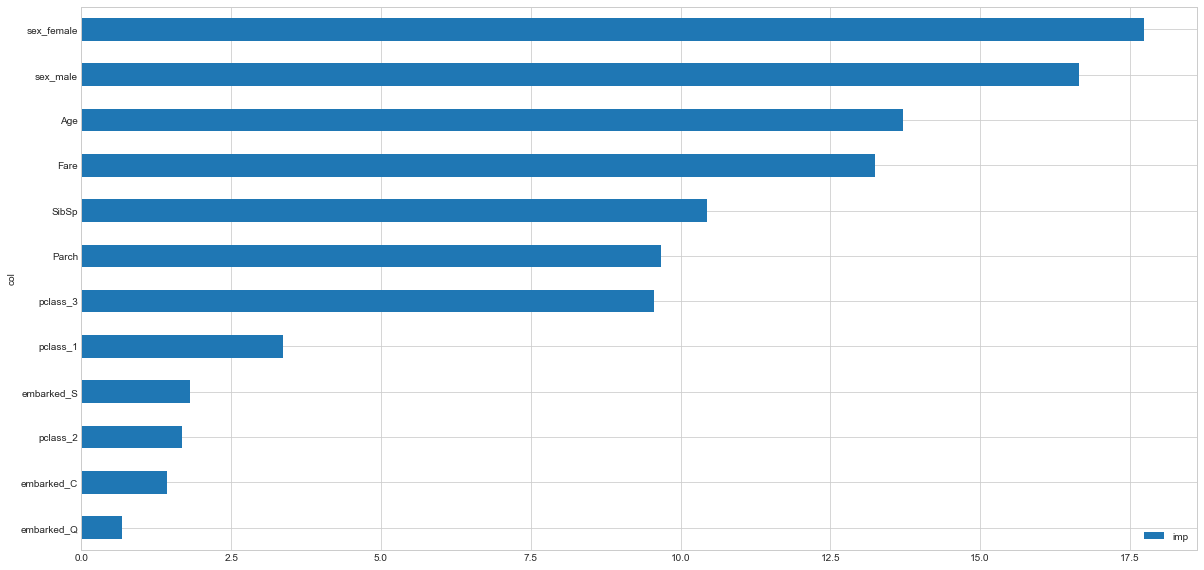

In [94]:
feature_importance(catboost_model, X_train)

### Precision & Recall

In [95]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8649477793872391
Recall: 0.7150294117647058
F1: 0.7826411832739438
AUC: 0.9019617914925533


# Submission

In [96]:
# We need our test dataframe to look like this one
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [97]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [104]:
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [105]:
# Let's look at test, it should have one hot encoded columns now
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [106]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [107]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [108]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [109]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [110]:
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [111]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [112]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [113]:
submission.to_csv('../Submission_with_mean_imputer.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [114]:
submissions_check = pd.read_csv("../Submission_with_mean_imputer.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
